In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.style as style
import matplotlib.cm as cm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt 
#from matplotlib.patches import Patch
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
#from cartopy.feature import ShapelyFeature
#import geopandas as gpd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm

import geopandas
import pyproj
import contextily as cx
import os
import folium



%matplotlib inline
plt.rcParams.update({
    'font.family': 'Arial',
    'font.sans-serif': ['Arial']})

In [112]:
#load and prep data for plotting

df_full = pd.read_csv("C:\\Users\\C837398661\\Desktop\\MDA8_O3_long_term_sites.csv", #load data
                 parse_dates=True,
                 index_col='Date')

df = df_full[(df_full.index.month >= 5) & (df_full.index.month <= 9)] #isolate May-September data

coords = pd.read_csv('C:\\Users\\C837398661\\Desktop\\MDA8_O3_long_term_sites_coords (1).csv')

In [113]:
df
#coords

DENVER - CAMP  Welby  Aurora East  Chatfield State Park  \
Date                                                                  
2005-05-01            NaN   37.0          NaN                  35.0   
2005-05-02            NaN   41.0          NaN                  26.0   
2005-05-03            NaN   47.0          NaN                  51.0   
2005-05-04            NaN   59.0          NaN                  61.0   
2005-05-05            NaN   51.0          NaN                  60.0   
...                   ...    ...          ...                   ...   
2023-09-26            NaN    NaN          NaN                   NaN   
2023-09-27            NaN    NaN          NaN                   NaN   
2023-09-28            NaN    NaN          NaN                   NaN   
2023-09-29            NaN    NaN          NaN                   NaN   
2023-09-30            NaN    NaN          NaN                   NaN   

            HIGHLAND RESERVOIR  La Casa  \
Date                                      
2005-05-01                36.0      NaN   
2005-05-02                34.0      NaN   
2005-05-03                53.0      NaN   
2005-05-04                59.0      NaN   
2005-05-05                59.0      NaN   
...                        ...      ...   
2023-09-26                 NaN      NaN   
2023-09-27                 NaN      NaN   
2023-09-28                 NaN      NaN   
2023-09-29                 NaN      NaN   
2023-09-30                 NaN      NaN   

            NATIONAL RENEWABLE ENERGY LABS - NREL  ROCKY FLATS-N  Briggsdale  \
Date                                                                           
2005-05-01                                   36.0           41.0         NaN   
2005-05-02                                   33.0           44.0         NaN   
2005-05-03                                   44.0           50.0         NaN   
2005-05-04                                   56.0           60.0         NaN   
2005-05-05                                   58.0           57.0         NaN   
...                                           ...            ...         ...   
2023-09-26                                    NaN            NaN         NaN   
2023-09-27                                    NaN            NaN         NaN   
2023-09-28                                    NaN            NaN         NaN   
2023-09-29                                    NaN            NaN         NaN   
2023-09-30                                    NaN            NaN         NaN   

            Greeley - Weld County Tower  Pawnee Buttes  FORT COLLINS - WEST  \
Date                                                                          
2005-05-01                          NaN            NaN                  NaN   
2005-05-02                          NaN            NaN                  NaN   
2005-05-03                          NaN            NaN                  NaN   
2005-05-04                          NaN            NaN                  NaN   
2005-05-05                          NaN            NaN                  NaN   
...                                 ...            ...                  ...   
2023-09-26                          NaN            NaN                 66.0   
2023-09-27                          NaN            NaN                 62.0   
2023-09-28                          NaN            NaN                 61.0   
2023-09-29                          NaN            NaN                 57.0   
2023-09-30                          NaN            NaN                 56.0   

            Fort Collins - CSU - S. Mason  Rocky Mountain NP - Long's Peak  
Date                                                                        
2005-05-01                            NaN                              NaN  
2005-05-02                            NaN                              NaN  
2005-05-03                            NaN                              NaN  
2005-05-04                            NaN                              NaN

In [114]:
x
x_ordinal = x.map(pd.Timestamp.toordinal)
(x_ordinal - x_ordinal.min())/(x_ordinal.max() - x_ordinal.min()) #normalizes x_ordinal numers starting at 0


Index([                   0.0,  0.0001486767766874814,  0.0002973535533749628,
       0.00044603033006244426,  0.0005947071067499256,  0.0007433838834374071,
        0.0008920606601248885,  0.0010407374368123698,  0.0011894142134998512,
        0.0013380909901873326,
       ...
           0.9986619090098127,     0.9988105857865002,     0.9989592625631877,
           0.9991079393398751,     0.9992566161165626,     0.9994052928932501,
           0.9995539696699376,      0.999702646446625,     0.9998513232233125,
                          1.0],
      dtype='float64', name='Date', length=8687)

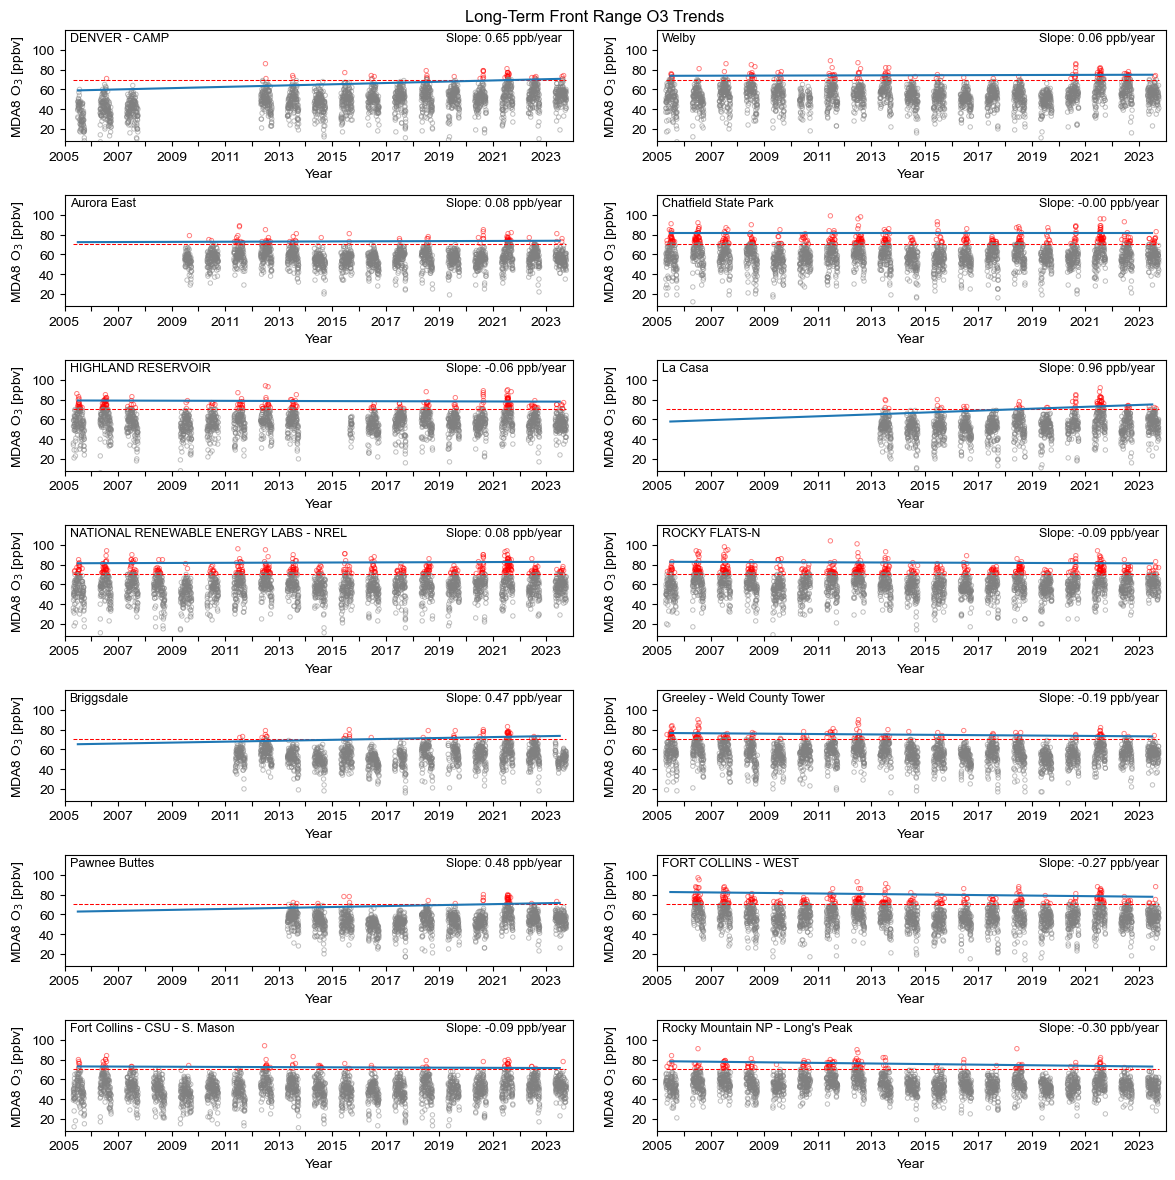

In [115]:
#plot data (long-term O3 trends)

quantile = 0.98

fig, axes = plt.subplots(int(len(df.columns)/2), 2, figsize = (12, 12)) #set up figure to have a separate column for each site (determined by len(df.columns))

ax = axes.flatten() #turn axes into a 1D array for easy looping
for i, site in enumerate(df.columns): #loop through all sites
        
    x = df.index #isolate datetime index
    y = df[site] #isolate data for the current site
        
    y_ex = y[y > 70] #isolate exceedance days (MDA8 > 70 ppb) and plot in red
    ax[i].scatter(x[y > 70], y_ex, label=site, alpha=.5, lw=0.7, s=10, marker='o', color='r', facecolor='none', zorder=0)
        
    y_below = y[y <= 70] #plot the rest of the days in gray
    ax[i].scatter(x[y <= 70], y_below , label=site, alpha=.5, lw=0.7, s=10, marker='o', color='gray', facecolor='none', zorder=0)

    x_ordinal = x.map(pd.Timestamp.toordinal) #creates a dataframe of x values that are increasing numbers
    x_ordinal = (x_ordinal - x_ordinal.min())/(x_ordinal.max() - x_ordinal.min()) #normalizes x_ordinal numers starting at 0
    data = pd.DataFrame({'y':y, 'x':x_ordinal}).dropna()

    model = smf.quantreg('y ~ x', data) #establish model
    result = model.fit(q=quantile)

    #plot a line, with x (array of years) and y values
    years = np.arange(len(x.year.unique())) #creates array (list) of individual years
    slope = result.params['x']/(len(x_ordinal)/365) #grabs slope and sets in in ppb per year not day
    #add std error later

    ax[i].plot(df.resample('YE').mean().index-pd.Timedelta(days=365/2),
       slope*years+result.params['Intercept']) #set up line using y = mx+b
    
    ax[i].annotate(f"Slope: {slope:.2f} ppb/year", xy=(0.75, 0.90), xycoords='axes fraction', fontsize=9) #what does slope represent again? Just general change?

for i in range(len(ax)):
    ax[i].set_ylim(8,120) #make y axis limits uniform
    ax[i].set_yticks([20, 40, 60, 80, 100]) #make y axis ticks uniform
    ax[i].set_xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2024-01-01')) #make x axis limit uniform
    ax[i].set_xticks(pd.date_range('2005-01-01', '2024-01-01', freq='YE')-pd.Timedelta(days=364)) #make x axis ticks uniform
    ax[i].hlines(70, xmin=df.index[0], xmax=df.index[-1], color='r', zorder=0, ls='--', lw=0.75) #add horizontal line at 70 ppb
    ax[i].annotate(df.columns[i], xy=(0.01, 0.90), xycoords='axes fraction', fontsize=9) #add site name to plots
    ax[i].set_ylabel('MDA8 O$_3$ [ppbv]') #add y axis label
    ax[i].set_xlabel('Year')

    #clean up x axis ticks
    for j, tick in enumerate(ax[i].xaxis.get_major_ticks()):
        if j % 2 == 1 and i < len(ax[i].xaxis.get_major_ticks()) - 1:
            tick.label1.set_visible(False)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.suptitle("Long-Term Front Range O3 Trends")

fig.tight_layout() #automatically adjusts subplot spacing

#figure out how to truncate some of the lines 

#2021 pyrogenic smoke comes from fires that are far away 

In [116]:
# retrain locations for the poster

#select locations to be used: based off of long-term data, problemness, O3 concentration, etc. 
locations = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST']
#location_indexs = ['3', '6', '7', '5', '12']
#create a new dataframe with only the designated locations for the poster
posterdf = df[locations].copy()
#test
posterdf
#this (above) is for coulns of a dataframe not rows; try again

#objective is to extract a subset of rows from the coords dataframe to make a postercoords dataframe
#use .iloc for integer-based indexing, which we set up earlier.
#postercoords = coords.iloc[['3', '6', '7', '5', '12']] #location_indexs = ['3', '6', '7', '5', '12']
#print(postercoords)

#coords
#short_names = ['Welby', 'Highland Reservoir', 'Aroura East', 'Denver', 'La Casa', 'Chatfield State Park', 'Rocky Flats', 'NREL', 'Greeley', 'Briggsdale', 'Pawnee Buttes', 'RMNP', 'Fort Collins West', 'Fort Collins CSU']
#shorter_names = ['Welby', 'Highland', 'Aroura', 'Denver', 'La Casa', 'Chatfield', 'Rocky Flats', 'NREL', 'Greeley', 'Briggsdale', 'Pawnee Buttes', 'RMNP', 'F.C. West', 'F.C. CSU']

# Add custom names as a new column
#coords['Short Name'] = short_names
#coords['Shorter Name'] = shorter_names


DENVER - CAMP  ROCKY FLATS-N  \
Date                                       
2005-05-01            NaN           41.0   
2005-05-02            NaN           44.0   
2005-05-03            NaN           50.0   
2005-05-04            NaN           60.0   
2005-05-05            NaN           57.0   
...                   ...            ...   
2023-09-26            NaN            NaN   
2023-09-27            NaN            NaN   
2023-09-28            NaN            NaN   
2023-09-29            NaN            NaN   
2023-09-30            NaN            NaN   

            NATIONAL RENEWABLE ENERGY LABS - NREL  Chatfield State Park  \
Date                                                                      
2005-05-01                                   36.0                  35.0   
2005-05-02                                   33.0                  26.0   
2005-05-03                                   44.0                  51.0   
2005-05-04                                   56.0                  61.0   
2005-05-05                                   58.0                  60.0   
...                                           ...                   ...   
2023-09-26                                    NaN                   NaN   
2023-09-27                                    NaN                   NaN   
2023-09-28                                    NaN                   NaN   
2023-09-29                                    NaN                   NaN   
2023-09-30                                    NaN                   NaN   

            FORT COLLINS - WEST  
Date                             
2005-05-01                  NaN  
2005-05-02                  NaN  
2005-05-03                  NaN  
2005-05-04                  NaN  
2005-05-05                  NaN  
...                         ...  
2023-09-26                 66.0  
2023-09-27                 62.0  
2023-09-28                 61.0  
2023-09-29                 57.0  
2023-09-30                 56.0  

[8687 rows x 5 columns]

In [117]:
posterdf

DENVER - CAMP  ROCKY FLATS-N  \
Date                                       
2005-05-01            NaN           41.0   
2005-05-02            NaN           44.0   
2005-05-03            NaN           50.0   
2005-05-04            NaN           60.0   
2005-05-05            NaN           57.0   
...                   ...            ...   
2023-09-26            NaN            NaN   
2023-09-27            NaN            NaN   
2023-09-28            NaN            NaN   
2023-09-29            NaN            NaN   
2023-09-30            NaN            NaN   

            NATIONAL RENEWABLE ENERGY LABS - NREL  Chatfield State Park  \
Date                                                                      
2005-05-01                                   36.0                  35.0   
2005-05-02                                   33.0                  26.0   
2005-05-03                                   44.0                  51.0   
2005-05-04                                   56.0                  61.0   
2005-05-05                                   58.0                  60.0   
...                                           ...                   ...   
2023-09-26                                    NaN                   NaN   
2023-09-27                                    NaN                   NaN   
2023-09-28                                    NaN                   NaN   
2023-09-29                                    NaN                   NaN   
2023-09-30                                    NaN                   NaN   

            FORT COLLINS - WEST  
Date                             
2005-05-01                  NaN  
2005-05-02                  NaN  
2005-05-03                  NaN  
2005-05-04                  NaN  
2005-05-05                  NaN  
...                         ...  
2023-09-26                 66.0  
2023-09-27                 62.0  
2023-09-28                 61.0  
2023-09-29                 57.0  
2023-09-30                 56.0  

[8687 rows x 5 columns]

c:\Users\C837398661\AppData\Local\anaconda3\envs\REU\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


IndexError: index 5 is out of bounds for axis 0 with size 5

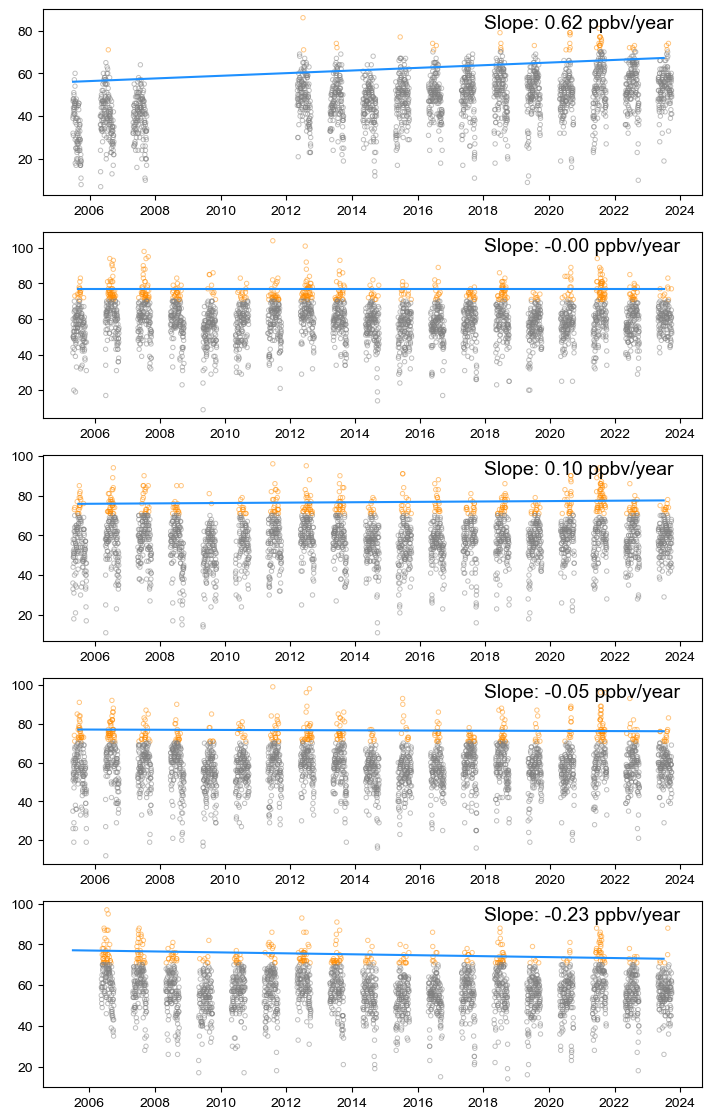

In [136]:
#THIS ONE
#long term O3 trends for poster

quantile = 0.95
titles = ('Denver', 'Rocky Flats', 'NREL', 'Chatfield State Park', 'Fort Collins West', 'dayofweek')

fig, axes = plt.subplots(5, 1, figsize = (8.5, 14)) #set up figure to have a separate column for each site (determined by len(df.columns))

pax = axes.flatten() #turn axes into a 1D array for easy looping
#for i, site in enumerate(posterdf.columns[:-1]): #loop through all sites
for i, site in enumerate(posterdf.columns): #loop through all sites
        
    px = posterdf.index #isolate datetime index
    py = posterdf[site] #isolate data for the current site
        
    py_ex = py[py > 70] #isolate exceedance days (MDA8 > 70 ppb) and plot in red
    pax[i].scatter(px[py > 70], py_ex, label=site, alpha=.5, lw=0.7, s=10, marker='o', color='darkorange', facecolor='none', zorder=0)
        
    py_below = py[py <= 70] #plot the rest of the days in gray
    pax[i].scatter(px[py <= 70], py_below , label=site, alpha=.5, lw=0.7, s=10, marker='o', color='gray', facecolor='none', zorder=0)

    px_ordinal = px.map(pd.Timestamp.toordinal) #creates a dataframe of x values that are increasing numbers
    px_ordinal = (px_ordinal - px_ordinal.min())/(px_ordinal.max() - px_ordinal.min()) #normalizes x_ordinal numers starting at 0
    posterdata = pd.DataFrame({'py':py, 'px':px_ordinal}).dropna()

    #print(posterdata)
    model = smf.quantreg('py ~ px', posterdata) #establish model
    result = model.fit(q=quantile)

    #plot a line, with x (array of years) and y values
    years = np.arange(len(px.year.unique())) #creates array (list) of individual years
    slope = result.params['px']/(len(px_ordinal)/365) #grabs slope and sets in in ppb per year not day
    #add std error later

    pax[i].plot(posterdf.resample('YE').mean().index-pd.Timedelta(days=365/2),
      slope*years+result.params['Intercept'], color = 'dodgerblue') #set up line using y = mx+b
    
    pax[i].annotate(f"Slope: {slope:.2f} ppbv/year", xy=(0.67, 0.90), xycoords='axes fraction', fontsize=14)

for i in range(len(pax)):
    pax[i].set_ylim(8,120) #make y axis limits uniform
    pax[i].set_yticks([20, 40, 60, 80, 100]) #make y axis ticks uniform
    pax[i].set_xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2024-01-01')) #make x axis limit uniform
    pax[i].set_xticks(pd.date_range('2005-01-01', '2024-01-01', freq='YE')-pd.Timedelta(days=364)) #make x axis ticks uniform
    pax[i].hlines(70, xmin=posterdf.index[0], xmax=posterdf.index[-1], color='darkorange', zorder=0, ls='--', lw=0.75) #add horizontal line at 70 ppb
    pax[i].annotate(titles[i], xy=(0.01, 0.90), xycoords='axes fraction', fontsize=16) #add site name to plots
 #   pax[i].set_title(posterdf.columns[i], fontsize=12)
   # pax[i].set_ylabel('MDA8 O$_3$ (ppbv)', fontsize = 13) #add y axis label
    pax[i].set_ylabel('O$_3$ Max. Daily 8-hr \n Avg. (ppbv)', fontsize = 12) #add y axis label
    pax[i].set_xlabel('Year', fontsize = 12)

    #clean up x axis ticks
    for j, tick in enumerate(ax[i].xaxis.get_major_ticks()):
        if j % 2 == 1 and i < len(pax[i].xaxis.get_major_ticks()) - 1:
            tick.label1.set_visible(False)
    pax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.suptitle("Long-Term Front Range O$_3$ Trends (95th Quantile)", fontsize = 18)
#pax[-1].set_xlabel('Year', fontsize = 15)
#pax[2].set_ylabel('MDA8 O$_3$ [ppbv]', fontsize = 15)
#pax[2].set_ylabel('O$_3$ Maximum Daily 8-Hour Average [ppbv]', fontsize = 15)

fig.subplots_adjust(top = 0.955, hspace = 0.4) #hspace=0.4)
#fig.tight_layout() #automatically adjusts subplot spacing

#figure out how to truncate some of the lines 

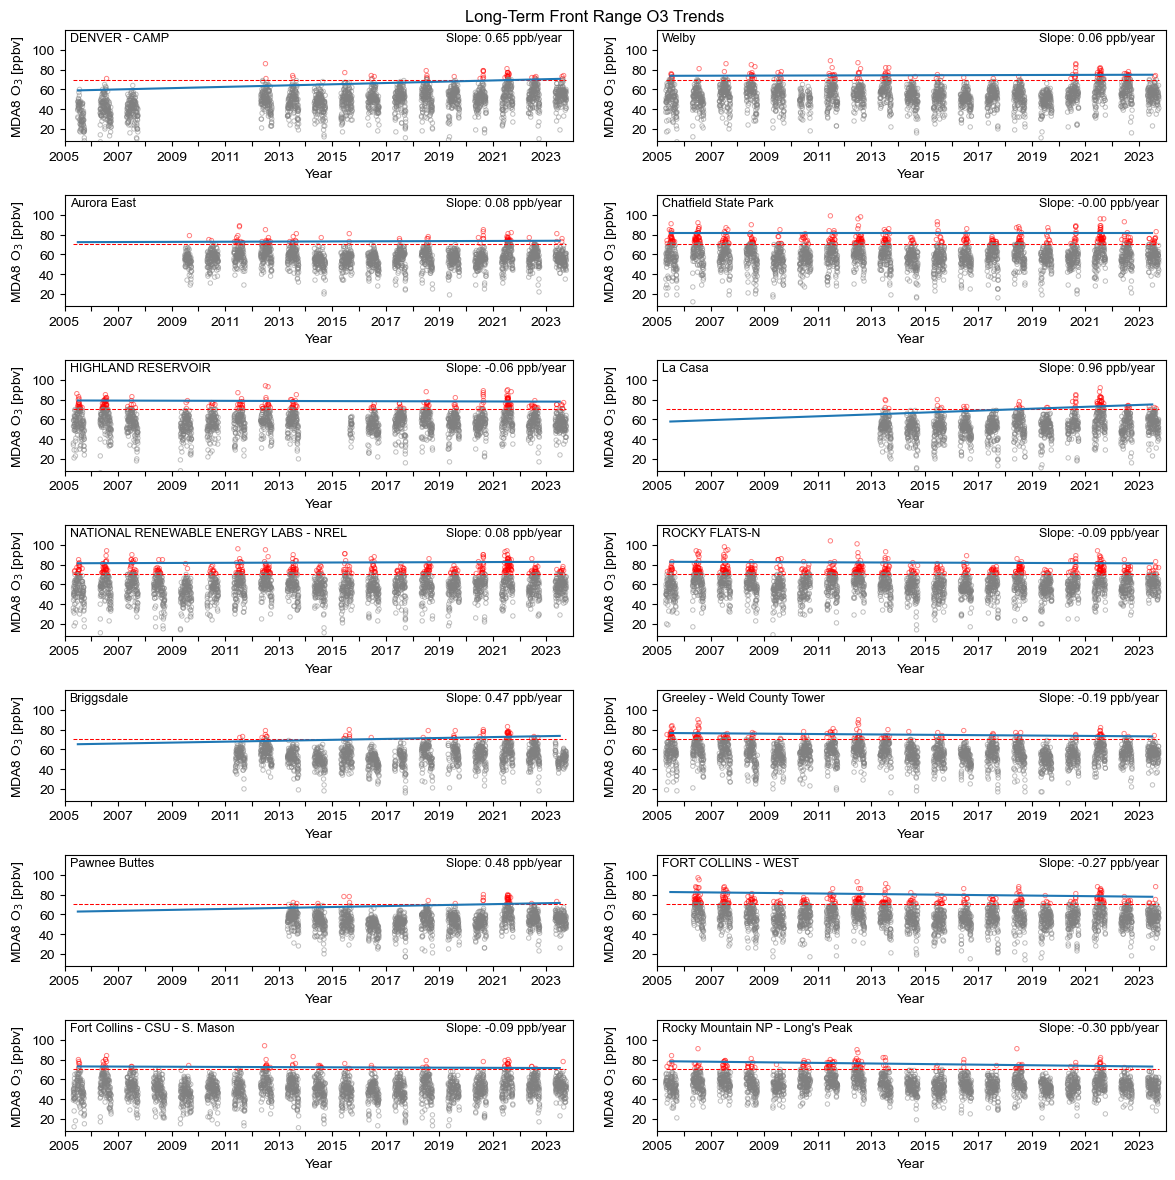

In [137]:
#plot data (long-term O3 trends)

quantile = 0.98

fig, axes = plt.subplots(int(len(df.columns)/2), 2, figsize = (12, 12)) #set up figure to have a separate column for each site (determined by len(df.columns))

ax = axes.flatten() #turn axes into a 1D array for easy looping
for i, site in enumerate(df.columns): #loop through all sites
        
    x = df.index #isolate datetime index
    y = df[site] #isolate data for the current site
        
    y_ex = y[y > 70] #isolate exceedance days (MDA8 > 70 ppb) and plot in red
    ax[i].scatter(x[y > 70], y_ex, label=site, alpha=.5, lw=0.7, s=10, marker='o', color='r', facecolor='none', zorder=0)
        
    y_below = y[y <= 70] #plot the rest of the days in gray
    ax[i].scatter(x[y <= 70], y_below , label=site, alpha=.5, lw=0.7, s=10, marker='o', color='gray', facecolor='none', zorder=0)

    x_ordinal = x.map(pd.Timestamp.toordinal) #creates a dataframe of x values that are increasing numbers
    x_ordinal = (x_ordinal - x_ordinal.min())/(x_ordinal.max() - x_ordinal.min()) #normalizes x_ordinal numers starting at 0
    data = pd.DataFrame({'y':y, 'x':x_ordinal}).dropna()

    model = smf.quantreg('y ~ x', data) #establish model
    result = model.fit(q=quantile)

    #plot a line, with x (array of years) and y values
    years = np.arange(len(x.year.unique())) #creates array (list) of individual years
    slope = result.params['x']/(len(x_ordinal)/365) #grabs slope and sets in in ppb per year not day
    #add std error later

    ax[i].plot(df.resample('YE').mean().index-pd.Timedelta(days=365/2),
       slope*years+result.params['Intercept']) #set up line using y = mx+b
    
    ax[i].annotate(f"Slope: {slope:.2f} ppb/year", xy=(0.75, 0.90), xycoords='axes fraction', fontsize=9) #what does slope represent again? Just general change?

for i in range(len(ax)):
    ax[i].set_ylim(8,120) #make y axis limits uniform
    ax[i].set_yticks([20, 40, 60, 80, 100]) #make y axis ticks uniform
    ax[i].set_xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2024-01-01')) #make x axis limit uniform
    ax[i].set_xticks(pd.date_range('2005-01-01', '2024-01-01', freq='YE')-pd.Timedelta(days=364)) #make x axis ticks uniform
    ax[i].hlines(70, xmin=df.index[0], xmax=df.index[-1], color='r', zorder=0, ls='--', lw=0.75) #add horizontal line at 70 ppb
    ax[i].annotate(df.columns[i], xy=(0.01, 0.90), xycoords='axes fraction', fontsize=9) #add site name to plots
    ax[i].set_ylabel('MDA8 O$_3$ [ppbv]') #add y axis label
    ax[i].set_xlabel('Year')

    #clean up x axis ticks
    for j, tick in enumerate(ax[i].xaxis.get_major_ticks()):
        if j % 2 == 1 and i < len(ax[i].xaxis.get_major_ticks()) - 1:
            tick.label1.set_visible(False)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.suptitle("Long-Term Front Range O3 Trends")

fig.tight_layout() #automatically adjusts subplot spacing

#figure out how to truncate some of the lines 

#2021 pyrogenic smoke comes from fires that are far away 

In [138]:
result.params['x']

-7.0666006997983

In [139]:
df

DENVER - CAMP  Welby  Aurora East  Chatfield State Park  \
Date                                                                  
2005-05-01            NaN   37.0          NaN                  35.0   
2005-05-02            NaN   41.0          NaN                  26.0   
2005-05-03            NaN   47.0          NaN                  51.0   
2005-05-04            NaN   59.0          NaN                  61.0   
2005-05-05            NaN   51.0          NaN                  60.0   
...                   ...    ...          ...                   ...   
2023-09-26            NaN    NaN          NaN                   NaN   
2023-09-27            NaN    NaN          NaN                   NaN   
2023-09-28            NaN    NaN          NaN                   NaN   
2023-09-29            NaN    NaN          NaN                   NaN   
2023-09-30            NaN    NaN          NaN                   NaN   

            HIGHLAND RESERVOIR  La Casa  \
Date                                      
2005-05-01                36.0      NaN   
2005-05-02                34.0      NaN   
2005-05-03                53.0      NaN   
2005-05-04                59.0      NaN   
2005-05-05                59.0      NaN   
...                        ...      ...   
2023-09-26                 NaN      NaN   
2023-09-27                 NaN      NaN   
2023-09-28                 NaN      NaN   
2023-09-29                 NaN      NaN   
2023-09-30                 NaN      NaN   

            NATIONAL RENEWABLE ENERGY LABS - NREL  ROCKY FLATS-N  Briggsdale  \
Date                                                                           
2005-05-01                                   36.0           41.0         NaN   
2005-05-02                                   33.0           44.0         NaN   
2005-05-03                                   44.0           50.0         NaN   
2005-05-04                                   56.0           60.0         NaN   
2005-05-05                                   58.0           57.0         NaN   
...                                           ...            ...         ...   
2023-09-26                                    NaN            NaN         NaN   
2023-09-27                                    NaN            NaN         NaN   
2023-09-28                                    NaN            NaN         NaN   
2023-09-29                                    NaN            NaN         NaN   
2023-09-30                                    NaN            NaN         NaN   

            Greeley - Weld County Tower  Pawnee Buttes  FORT COLLINS - WEST  \
Date                                                                          
2005-05-01                          NaN            NaN                  NaN   
2005-05-02                          NaN            NaN                  NaN   
2005-05-03                          NaN            NaN                  NaN   
2005-05-04                          NaN            NaN                  NaN   
2005-05-05                          NaN            NaN                  NaN   
...                                 ...            ...                  ...   
2023-09-26                          NaN            NaN                 66.0   
2023-09-27                          NaN            NaN                 62.0   
2023-09-28                          NaN            NaN                 61.0   
2023-09-29                          NaN            NaN                 57.0   
2023-09-30                          NaN            NaN                 56.0   

            Fort Collins - CSU - S. Mason  Rocky Mountain NP - Long's Peak  
Date                                                                        
2005-05-01                            NaN                              NaN  
2005-05-02                            NaN                              NaN  
2005-05-03                            NaN                              NaN  
2005-05-04                            NaN                              NaN

C:\Users\C837398661\AppData\Local\Temp\ipykernel_22172\14880863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


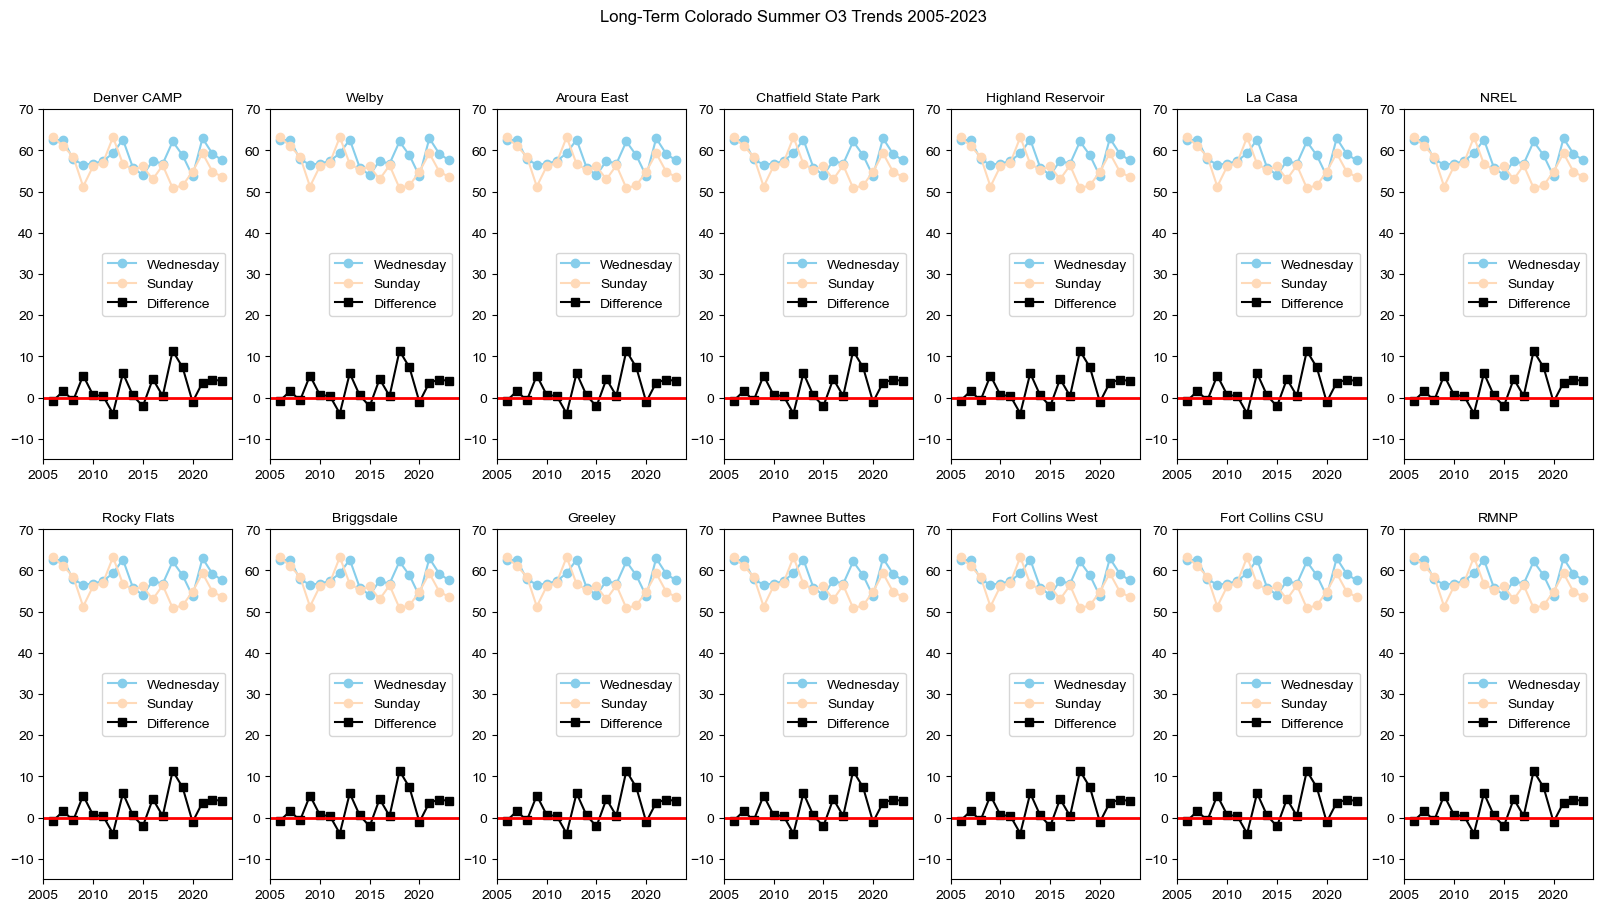

In [140]:
# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)
df

#define function to remove NaN values from spreadsheets
def remove_nans(arr):
    return arr[~np.isnan(arr)]

fs = 10

#select wednesday and sundays to use for analysis
wednesday_data = df[df['dayofweek'] == 3]  # wed is 3 in the custom mapping
sunday_data = df[df['dayofweek'] == 0]     # sun is 0 in the custom mapping

#creates a space for the plots to live
fig, ax = plt.subplots(2, 7, figsize = (20,10))
#corrects numpy.array issue that has no plot
ax = ax.flatten()
titles = ('Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP')

averages_differences = []

#for i, column in enumerate(df.columns):
for i in range(len(titles)):

    #arrayify 
    grouped = df.groupby('dayofweek')[column].apply(np.array) 
    grouped = grouped.apply(remove_nans)

    # Calculate averages for O3 and NO2 on Wednesdays and Sundays at each location
   # wednesday_averages = wednesday_data.groupby(column)[column].mean()
   # sunday_averages = sunday_data.groupby(column)[column].mean()
    wednesday_averages = wednesday_data[column].groupby(wednesday_data.index.year).mean()
    sunday_averages = sunday_data[column].groupby(sunday_data.index.year).mean()
    averages_difference = wednesday_averages - sunday_averages
    #print("Average Wednesday O3 and NO2")
    #print(wednesday_averages)
    #print("Average Sunday O3 and NO2")
    #print(sunday_averages)
    #I am only getting lenghts of ~60-200 for the averages, which is probably not enough for the number of weeks in this study, even with patchy data??
    ax[i].plot(wednesday_averages, marker = "o", color = 'skyblue', label = "Wednesday")
    ax[i].plot(sunday_averages, marker = "o", color = 'peachpuff', label = "Sunday")
    ax[i].plot(averages_difference, marker = "s", color = 'black', label = "Difference")
    ax[i].axhline(y=0,linewidth=2, color='r')
    ax[i].legend()
    ax[i].set_title(titles[i], fontsize = fs)
    ax[i].set_ylim(-15, 70)
    ax[i].set_xlim(2005, 2024)
   # ax[i].set_xlabel('Week Sampled', fontsize=7, color='k')
   # ax[i].set_ylabel('Average ppbv', fontsize=7, color='k')
    #tick labels
    averages_differences.append(averages_difference)
    
# make labels for x and y axes along the left side and bottom
#for i in range(2):
#    ax[i*7].set_ylabel('ppbv', fontsize=fs)
#for j in range(6):
#    ax[7+j].set_xlabel('Year', fontsize=fs)

#titles the page
fig.suptitle("Long-Term Colorado Summer O3 Trends 2005-2023")
#Summer is start of May - end of September
#adds space between plots
fig.subplots_adjust(hspace=0.2)
plt.show()

#fig.autofmt_xdate()
 
#THIS IS A MEAUSURE OF OZONES'S SENSITIVITY


In [141]:
#adjust for Rocky flats, FC CSU, NREL, Greely, Chattfield

C:\Users\C837398661\AppData\Local\Temp\ipykernel_22172\2243662889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


IndexError: index 14 is out of bounds for axis 0 with size 14

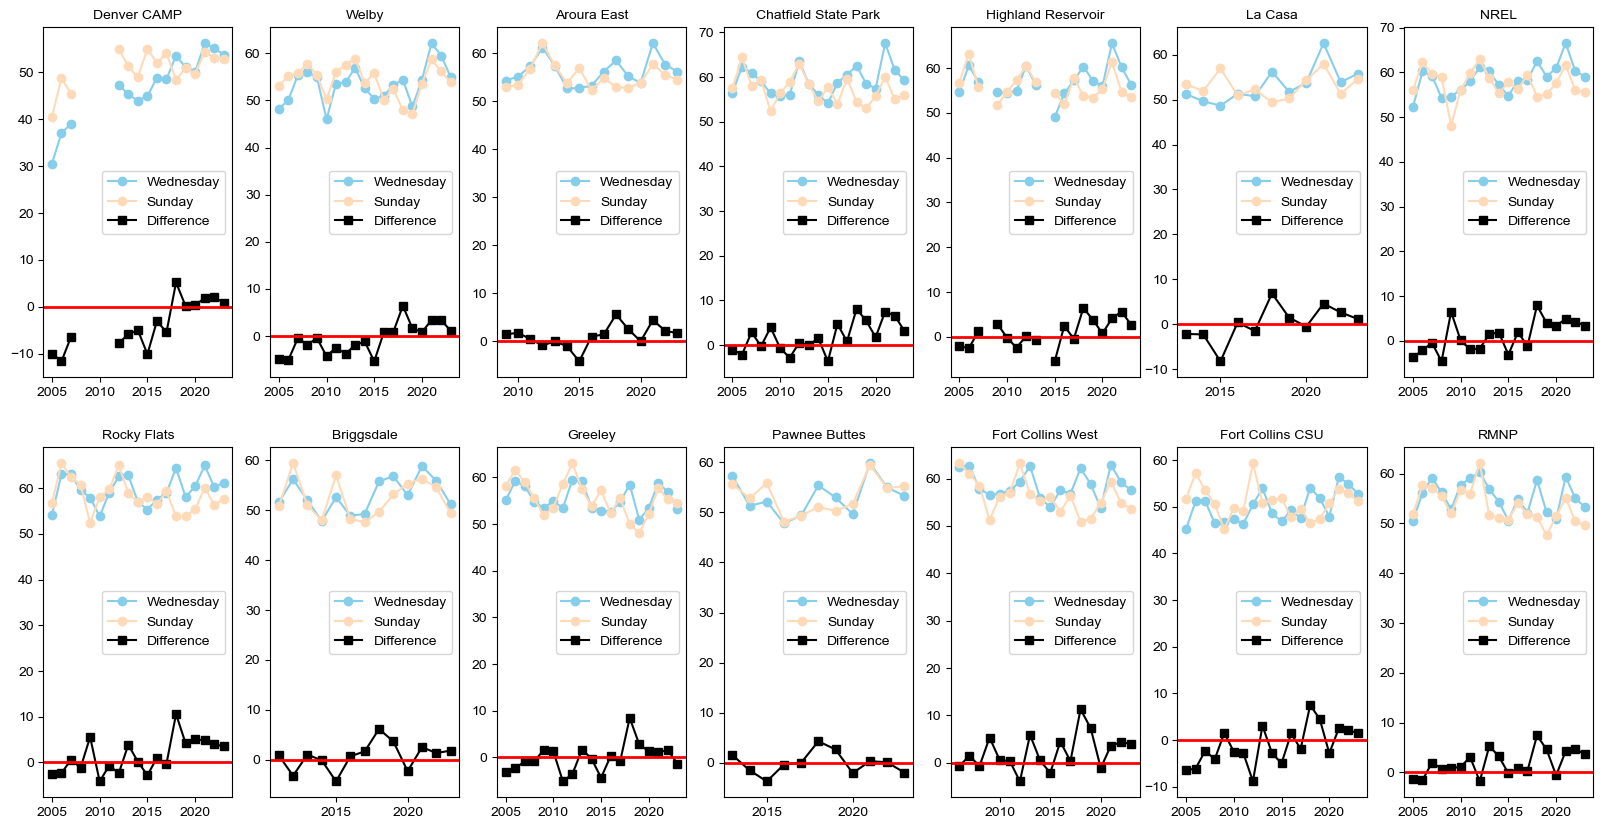

In [142]:
# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)
df

#define function to remove NaN values from spreadsheets
def remove_nans(arr):
    return arr[~np.isnan(arr)]

fs = 10

#select wednesday and sundays to use for analysis
wednesday_data = df[df['dayofweek'] == 3]  # wed is 3 in the custom mapping
sunday_data = df[df['dayofweek'] == 0]     # sun is 0 in the custom mapping

#creates a space for the plots to live
fig, ax = plt.subplots(2, 7, figsize = (20,10))
#corrects numpy.array issue that has no plot
ax = ax.flatten()
titles = ('Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP')

for i, column in enumerate(df):
    #arrayify 
    grouped = df.groupby('dayofweek')[column].apply(np.array) 
    grouped = grouped.apply(remove_nans)

    # Calculate averages for O3 and NO2 on Wednesdays and Sundays at each location
   # wednesday_averages = wednesday_data.groupby(column)[column].mean()
   # sunday_averages = sunday_data.groupby(column)[column].mean()
    wednesday_averages = wednesday_data[column].groupby(wednesday_data.index.year).mean()
    sunday_averages = sunday_data[column].groupby(sunday_data.index.year).mean()
    averages_difference = wednesday_averages - sunday_averages
    #print("Average Wednesday O3 and NO2")
    #print(wednesday_averages)
    #print("Average Sunday O3 and NO2")
    #print(sunday_averages)
    #I am only getting lenghts of ~60-200 for the averages, which is probably not enough for the number of weeks in this study, even with patchy data??
    ax[i].plot(wednesday_averages, marker = "o", color = 'skyblue', label = "Wednesday")
    ax[i].plot(sunday_averages, marker = "o", color = 'peachpuff', label = "Sunday")
    ax[i].plot(averages_difference, marker = "s", color = 'black', label = "Difference")
    ax[i].axhline(y=0,linewidth=2, color='r')
    ax[i].legend()
    ax[i].set_title(titles[i], fontsize = fs)
   # ax[i].set_xlabel('Year', fontsize=10, color='k')
   # ax[i].set_ylabel('O3 [ppbv]', fontsize=10, color='k')
    #tick labels
    
# make labels for x and y axes along the left side and bottom
for i in range(2):
    ax[i*7].set_ylabel('PPBV', fontsize=fs)
for j in range(7):
    ax[7+j].set_xlabel('Year', fontsize=fs)

#titles the page
fig.suptitle("Long-Term Front Range Summer O3 Sensitivity 2005-2023", fontsize = 14)
#adds space between plots
fig.subplots_adjust(top = 0.9, hspace=0.5)
plt.show()

In [143]:
posterdf

DENVER - CAMP  ROCKY FLATS-N  \
Date                                       
2005-05-01            NaN           41.0   
2005-05-02            NaN           44.0   
2005-05-03            NaN           50.0   
2005-05-04            NaN           60.0   
2005-05-05            NaN           57.0   
...                   ...            ...   
2023-09-26            NaN            NaN   
2023-09-27            NaN            NaN   
2023-09-28            NaN            NaN   
2023-09-29            NaN            NaN   
2023-09-30            NaN            NaN   

            NATIONAL RENEWABLE ENERGY LABS - NREL  Chatfield State Park  \
Date                                                                      
2005-05-01                                   36.0                  35.0   
2005-05-02                                   33.0                  26.0   
2005-05-03                                   44.0                  51.0   
2005-05-04                                   56.0                  61.0   
2005-05-05                                   58.0                  60.0   
...                                           ...                   ...   
2023-09-26                                    NaN                   NaN   
2023-09-27                                    NaN                   NaN   
2023-09-28                                    NaN                   NaN   
2023-09-29                                    NaN                   NaN   
2023-09-30                                    NaN                   NaN   

            FORT COLLINS - WEST  dayofweek  
Date                                        
2005-05-01                  NaN          0  
2005-05-02                  NaN          1  
2005-05-03                  NaN          2  
2005-05-04                  NaN          3  
2005-05-05                  NaN          4  
...                         ...        ...  
2023-09-26                 66.0          2  
2023-09-27                 62.0          3  
2023-09-28                 61.0          4  
2023-09-29                 57.0          5  
2023-09-30                 56.0          6  

[8687 rows x 6 columns]

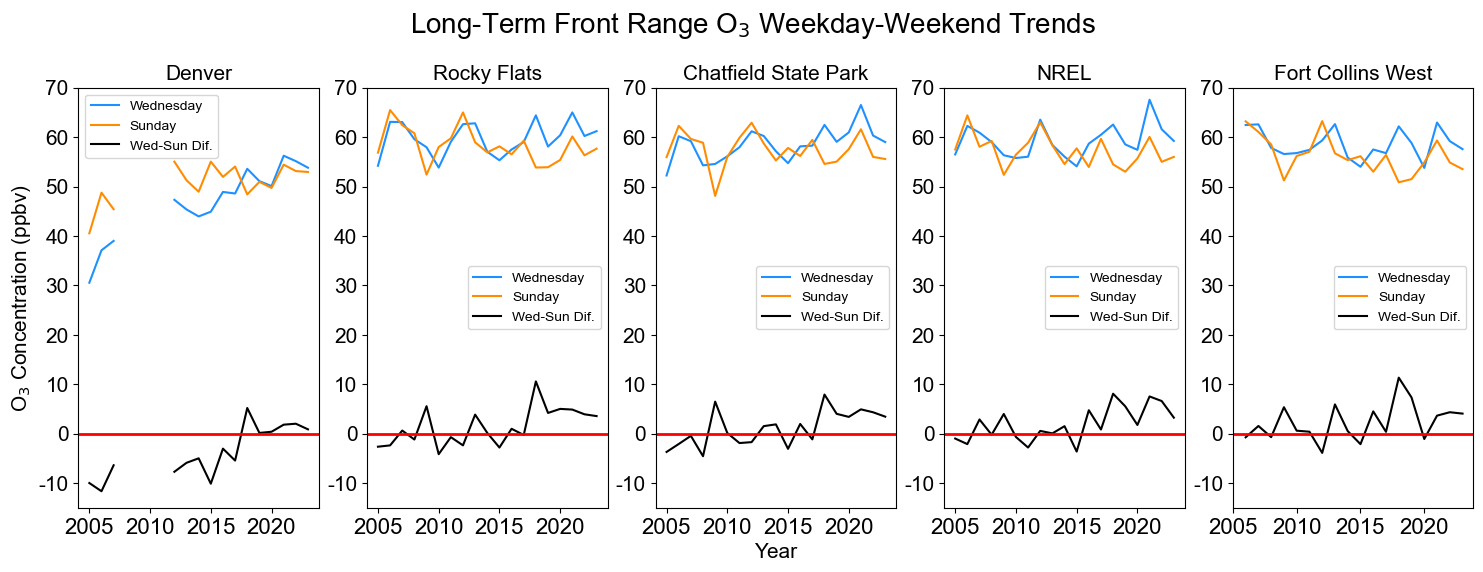

In [161]:
#poster peach plots!!!

# # group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
posterdf['dayofweek'] = df.index.dayofweek.map(custom_mapping)
posterdf

#define function to remove NaN values from spreadsheets
def remove_nans(arr):
    return arr[~np.isnan(arr)]

fs = 10

#select wednesday and sundays to use for analysis
pwednesday_data = df[df['dayofweek'] == 3]  # wed is 3 in the custom mapping
psunday_data = df[df['dayofweek'] == 0]     # sun is 0 in the custom mapping

num_plots = len(posterdf.columns[:-1]) 
#creates a space for the plots to live
fig, ax = plt.subplots(1, 5, figsize = (18, 6))
#corrects numpy.array issue that has no plot
ax = ax.flatten()
titles = ('Denver', 'Rocky Flats', 'Chatfield State Park', 'NREL', 'Fort Collins West', 'dayofweek')

for i, column in enumerate(posterdf.columns[:-1]):
    #arrayify 
    pgrouped = posterdf.groupby('dayofweek')[column].apply(np.array) 
    pgrouped = pgrouped.apply(remove_nans)

    # Calculate averages for O3 on Wednesdays and Sundays at each location
    pwednesday_averages = pwednesday_data[column].groupby(pwednesday_data.index.year).mean()
    psunday_averages = psunday_data[column].groupby(psunday_data.index.year).mean()
    paverages_difference = pwednesday_averages - psunday_averages
    ax[i].plot(pwednesday_averages, color = 'dodgerblue', label = "Wednesday")
    ax[i].plot(psunday_averages, color = 'darkorange', label = "Sunday")
    ax[i].plot(paverages_difference, color = 'black', label = "Wed-Sun Dif.")
    ax[i].axhline(y=0,linewidth=2, color='r')
    ax[i].legend()
    ax[i].set_title(titles[i], fontsize = 15)

   # ax[i].set_ylabel('O3 [ppbv]', fontsize=10, color='k')  
    #tick labels

    #start_year = posterdf.index.min().year
    #end_year = posterdf.index.max().year
    #years = pd.date_range(start=pd.Timestamp(f'{start_year}-01-01'), end=pd.Timestamp(f'{end_year}-9-30'), freq='5YS')
    #ax[i].set_xticks(years, [year.year for year in years])
    #ax[i].set_xticklabels([year.year for year in years], rotation=45)

    start_year = posterdf.index.min().year
    end_year = posterdf.index.max().year
    years = range(start_year, end_year + 1, 5)  # Generate range of years every 5 years
    ax[i].set_xticks(years)
    ax[i].set_xticklabels([year for year in years], fontsize = 16)
    #ax[i].yaxis.set_major_formatter('{:.0f}')

import matplotlib.ticker as ticker  # Import ticker module for formatting
    
for i in range(5):
    ax[i].set_ylim(-15,70)
    ax[i].set_yticks([-10, 0, 10, 20, 30, 40, 50, 60, 70], ['-10', '0', '10', '20', '30', '40', '50', '60', '70'])
 #   ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))  # Format as integers without decimals
 #   ax[i].set_yticks(ax[i].get_yticks(), fontsize = 13)  # Ensure ticks are correctly set
    ax[i].set_yticklabels(ax[i].get_yticks(), fontsize=15)
 

ax[0].set_ylabel('O$_3$ Concentration (ppbv)', fontsize=15)
ax[-3].set_xlabel('Year', fontsize=15)
fig.suptitle("Long-Term Front Range O$_3$ Weekday-Weekend Trends", fontsize=20)
fig.subplots_adjust(top=0.85, hspace=1.0, bottom = 0.15)

plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_13652\3067996596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


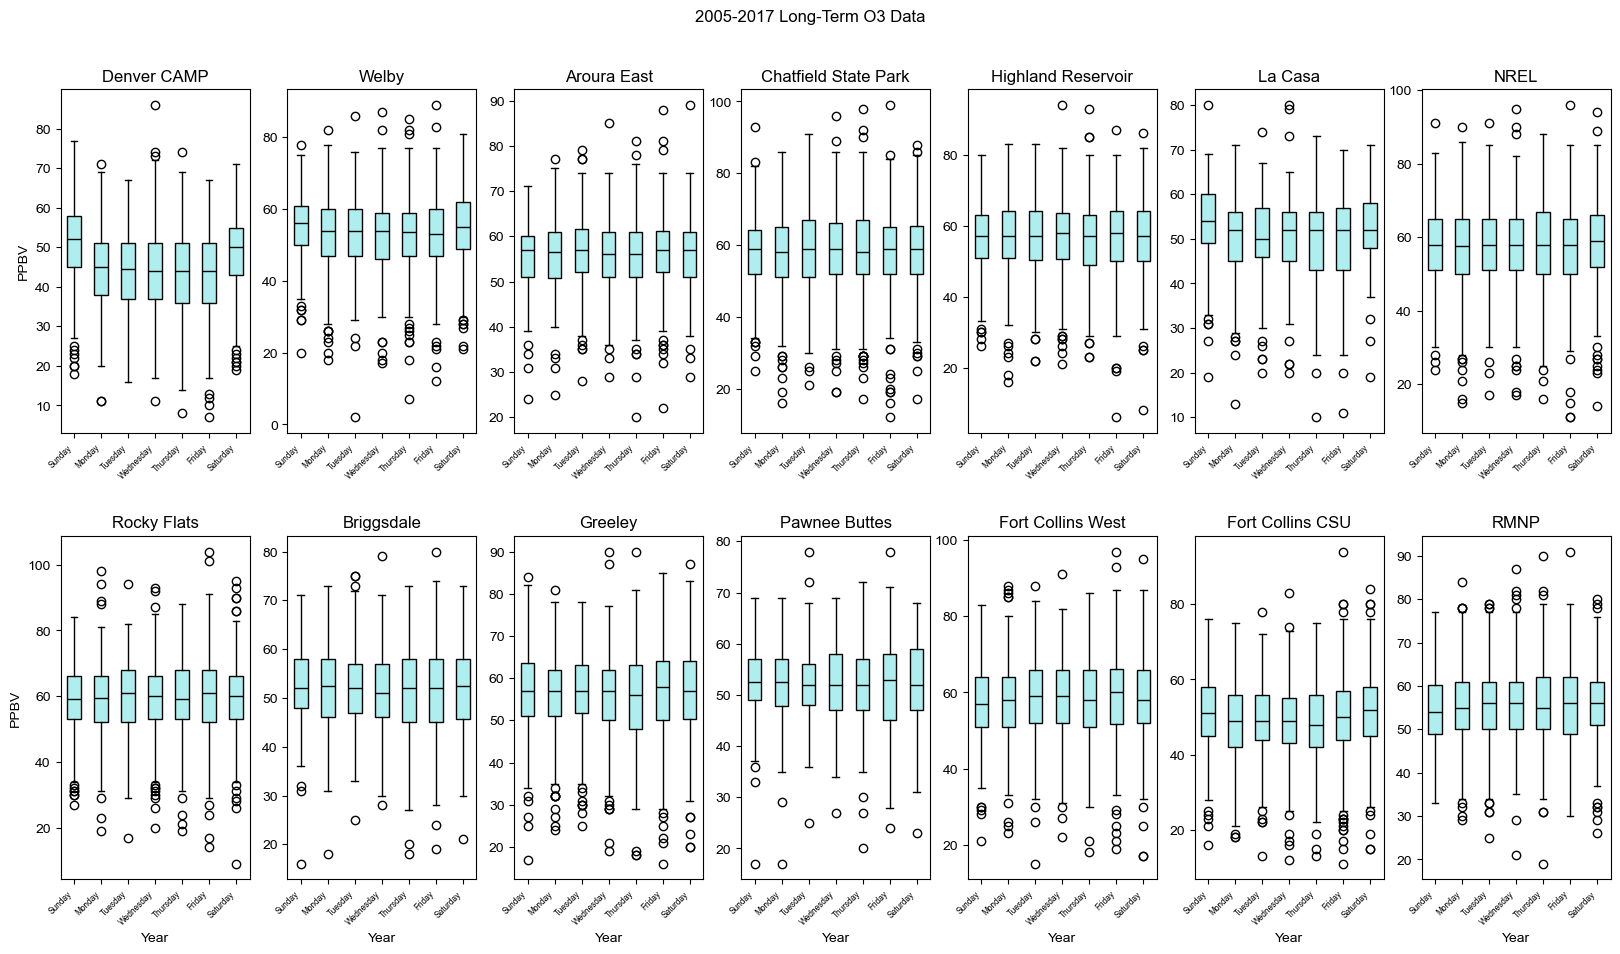

In [ ]:
# 2005-2017 boxplots 

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)

#restrain timeframe to between 2005 and 2017
df0517 = df[(df.index.year>=2005)&(df.index.year<=2017)]

#remove nans
def remove_nans(arr):
    return arr[~np.isnan(arr)]

fig, ax = plt.subplots(2, 7, figsize = (20, 10))
#titles the page
fig.suptitle("2005-2017 Long-Term O3 Data")
#adds space between plots
#fig.subplots_adjust(top = 09.5, hspace=0.3)

#makes the 2D array flat again?
ax = ax.flatten()
#font size
fs = 7
fs2 = 12
fs3 = 10
# tick labels
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']

num_plots = min(len(df0517.columns), 14)  # Ensure we don't exceed the number of subplots available

#use a loop to do this to all columns all at once
for i, column in enumerate(df0517.columns[:-1]):

        #arrayify 
        grouped0517 = df0517.groupby('dayofweek')[column].apply(np.array) 
        grouped0517 = grouped0517.apply(remove_nans)

        ax[i].boxplot(grouped0517, patch_artist = True, boxprops = dict(facecolor = "paleturquoise"), medianprops = dict(color = "black"))
        ax[i].set_title(titles[i], fontsize = fs2)
        #tick labels
        ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize = 6) 
        #ax[i].set_ylim(0,140)
        #colors the region inside the chart
        #ax[i].set_facecolor(color)

for i in range(2):
    ax[i*7].set_ylabel('PPBV', fontsize=fs3)
for j in range(7):
    ax[7+j].set_xlabel('Year', fontsize=fs3)

fig.subplots_adjust(top = 0.9, hspace=0.3)
plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_22172\330675710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


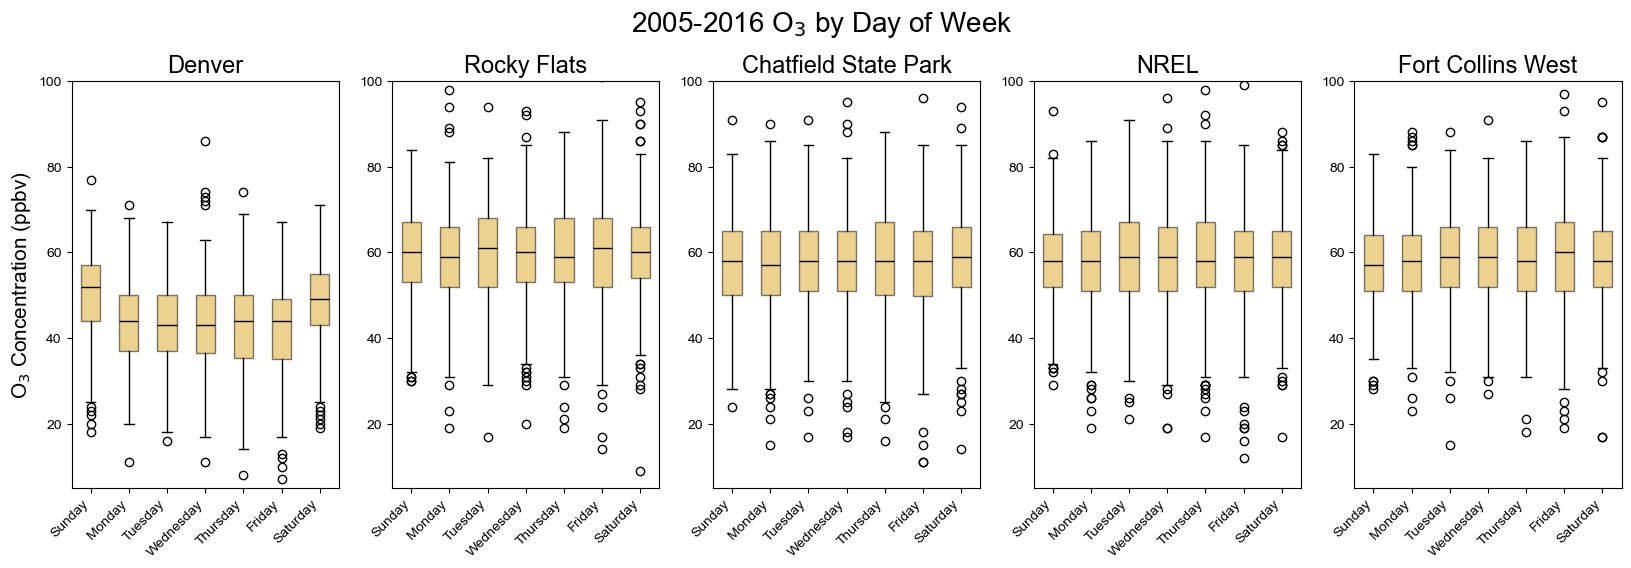

In [162]:
# 2005-2017 boxplots 

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)

#restrain timeframe to between 2005 and 2017
df0517 = df[(df.index.year>=2005)&(df.index.year<2017)]

#remove nans
def remove_nans(arr):
    return arr[~np.isnan(arr)]

fig, ax = plt.subplots(1, 5, figsize = (20, 5.5))
#titles the page
fig.suptitle("2005-2016 O$_3$ by Day of Week", fontsize =20 )
#adds space between plots
#fig.subplots_adjust(top = 09.5, hspace=0.3)

def set_boxplot_color(box, color, alpha):
    for patch in box['boxes']:
        patch.set_facecolor((*color, alpha))  # RGB + Alpha
        
#makes the 2D array flat again?
ax = ax.flatten()
#font size
fs = 7
fs2 = 12
fs3 = 10
# tick labels
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
#titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
titles = ['Denver', 'Rocky Flats', 'Chatfield State Park', 'NREL', 'Fort Collins West']

num_plots = min(len(df0517.columns), 14)  # Ensure we don't exceed the number of subplots available

sites = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST', 'dayofweek']


#use a loop to do this to all columns all at once
for i, column in enumerate(df0517[sites].columns[:-1]):

        #arrayify 
        grouped0517 = df0517.groupby('dayofweek')[column].apply(np.array) 
        grouped0517 = grouped0517.apply(remove_nans)

        ax[i].boxplot(grouped0517, patch_artist = True, boxprops = dict(facecolor = "goldenrod", alpha=0.5), medianprops = dict(color = "black"))
        ax[i].set_title(titles[i], fontsize = 17)
        #tick labels
        ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize = 10) 
        #ax[i].set_ylim(0,140)
        #colors the region inside the chart
        #ax[i].set_facecolor(color)

for i in range(5):
    ax[i].set_ylim(5, 100)  

ax[0].set_ylabel('O$_3$ Concentration (ppbv)', fontsize=15)
#ax[-3].set_xlabel('Day of Week', fontsize=15)

fig.subplots_adjust(top = 0.85, hspace=0.3)
plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_22172\2741099545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


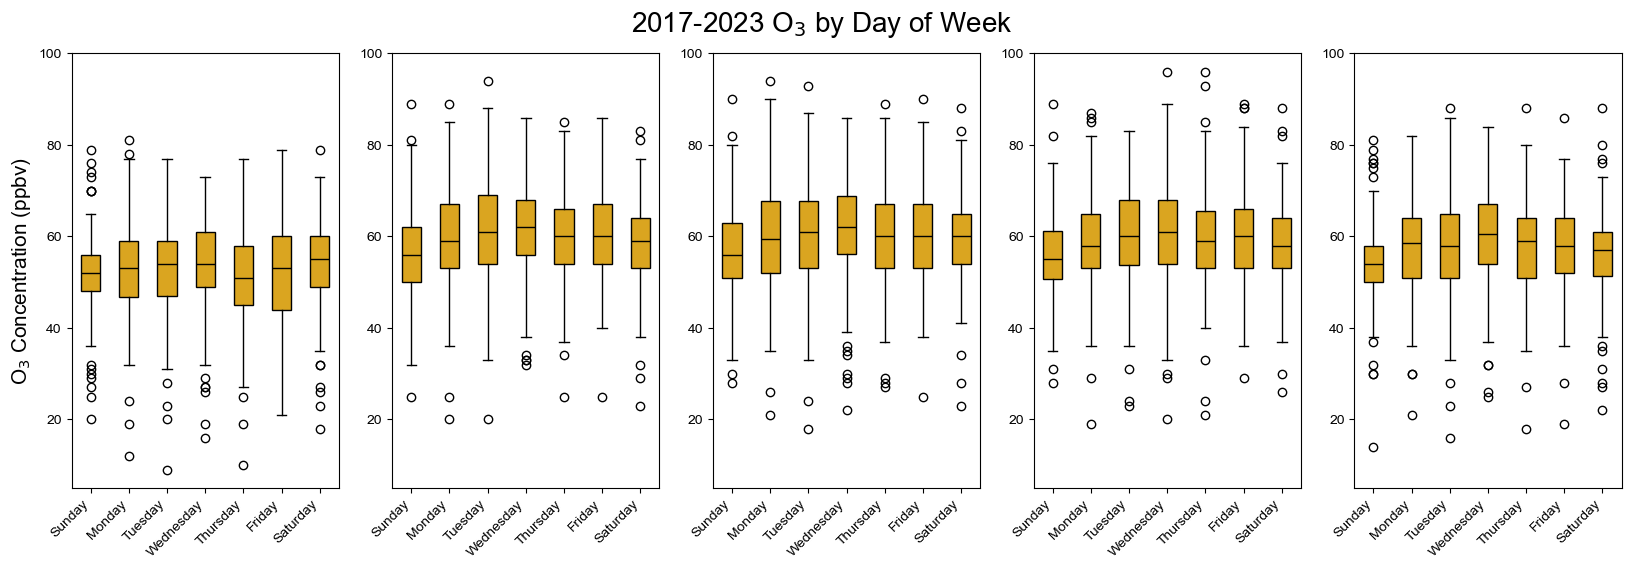

In [163]:
# 2017-2023 boxplots 

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)

#restrain timeframe to between 2005 and 2017
df0517 = df[(df.index.year>2017)]

#remove nans
def remove_nans(arr):
    return arr[~np.isnan(arr)]

fig, ax = plt.subplots(1, 5, figsize = (20, 5.5))
#titles the page
fig.suptitle("2017-2023 O$_3$ by Day of Week", fontsize =20 )
#adds space between plots
#fig.subplots_adjust(top = 09.5, hspace=0.3)

#makes the 2D array flat again?
ax = ax.flatten()
#font size
fs = 7
fs2 = 12
fs3 = 10
# tick labels
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
#titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
titles = ['Denver', 'Rocky Flats', 'Chatfield State Park', 'NREL', 'Fort Collins West']

num_plots = min(len(df0517.columns), 14)  # Ensure we don't exceed the number of subplots available

sites = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST', 'dayofweek']


#use a loop to do this to all columns all at once
for i, column in enumerate(df0517[sites].columns[:-1]):

        #arrayify 
        grouped0517 = df0517.groupby('dayofweek')[column].apply(np.array) 
        grouped0517 = grouped0517.apply(remove_nans)

        ax[i].boxplot(grouped0517, patch_artist = True, boxprops = dict(facecolor = "goldenrod", alpha=1), medianprops = dict(color = "black"))
        #ax[i].set_title(titles[i], fontsize = 17)
        #tick labels
        ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize = 10) 
        #ax[i].set_ylim(0,140)
        #colors the region inside the chart
        #ax[i].set_facecolor(color)

for i in range(5):
    ax[i].set_ylim(5, 100)  

ax[0].set_ylabel('O$_3$ Concentration (ppbv)', fontsize=15)
#ax[-3].set_xlabel('Day of Week', fontsize=15)

fig.subplots_adjust(top = 0.9, hspace=0.3)
plt.show()

In [ ]:
sites = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST']

df0517[sites]

DENVER - CAMP  ROCKY FLATS-N  \
Date                                       
2005-05-01            NaN           41.0   
2005-05-02            NaN           44.0   
2005-05-03            NaN           50.0   
2005-05-04            NaN           60.0   
2005-05-05            NaN           57.0   
...                   ...            ...   
2017-09-26            NaN            NaN   
2017-09-27            NaN            NaN   
2017-09-28            NaN            NaN   
2017-09-29            NaN            NaN   
2017-09-30            NaN            NaN   

            NATIONAL RENEWABLE ENERGY LABS - NREL  Chatfield State Park  \
Date                                                                      
2005-05-01                                   36.0                  35.0   
2005-05-02                                   33.0                  26.0   
2005-05-03                                   44.0                  51.0   
2005-05-04                                   56.0                  61.0   
2005-05-05                                   58.0                  60.0   
...                                           ...                   ...   
2017-09-26                                    NaN                   NaN   
2017-09-27                                    NaN                   NaN   
2017-09-28                                    NaN                   NaN   
2017-09-29                                    NaN                   NaN   
2017-09-30                                    NaN                   NaN   

            FORT COLLINS - WEST  
Date                             
2005-05-01                  NaN  
2005-05-02                  NaN  
2005-05-03                  NaN  
2005-05-04                  NaN  
2005-05-05                  NaN  
...                         ...  
2017-09-26                 42.0  
2017-09-27                 22.0  
2017-09-28                 30.0  
2017-09-29                 29.0  
2017-09-30                 43.0  

[5933 rows x 5 columns]

C:\Users\C837398661\AppData\Local\Temp\ipykernel_32428\525973798.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


KeyError: "['dayofweek'] not in index"

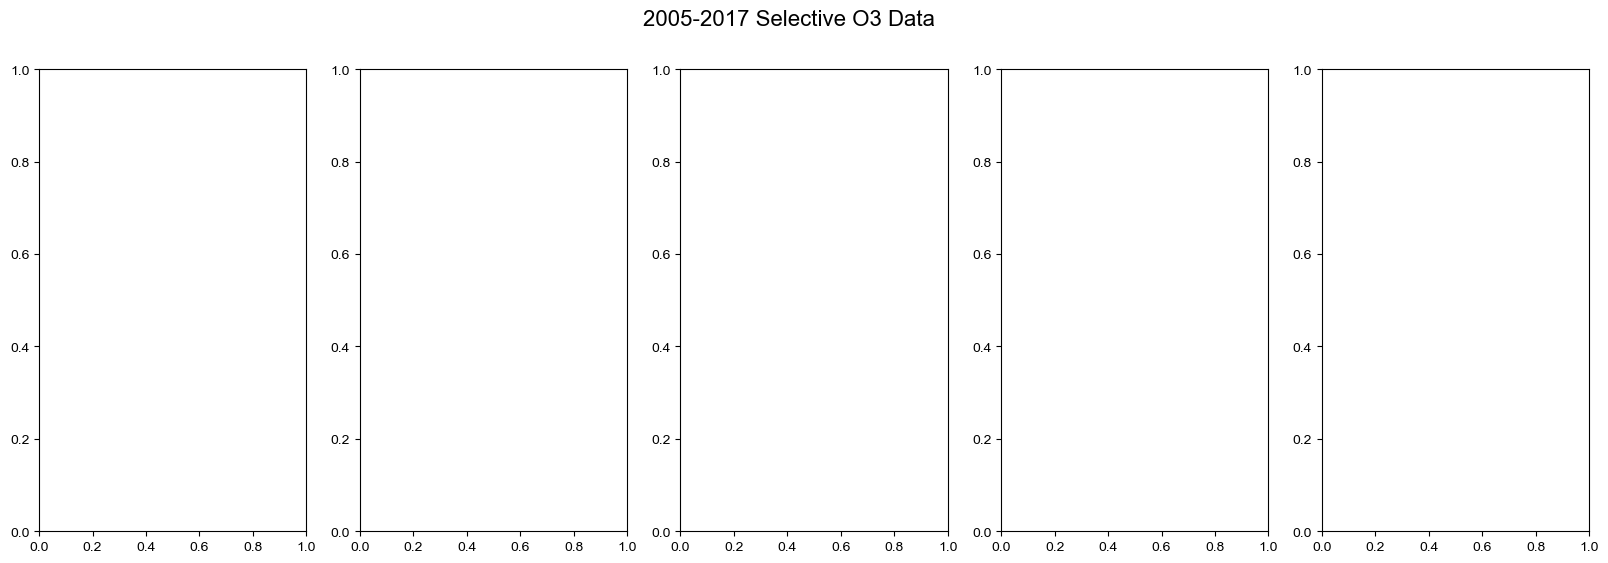

In [ ]:
# THIS ONE!!! for poster
# 2017-2024 boxplots 

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)

#restrain timeframe to AFTER 2017
pdf0517 = posterdf[(posterdf.index.year>=2005)&(posterdf.index.year<=2017)]

#remove nans
#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

fig, ax = plt.subplots(1, 5, figsize = (20, 6))
#titles the page
fig.suptitle("2005-2017 Selective O3 Data", fontsize = 16)
#adds space between plots
#fig.subplots_adjust(top = 09.5, hspace=0.3)

#makes the 2D array flat again?
ax = ax.flatten()
#font size
fs = 7
fs2 = 12
fs3 = 10
# tick labels

#BANKS
#titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
#locations = ['DENVER - CAMP', 'Welby', 'Aurora East', 'Chatfield State Park', 'HIGHLAND RESERVOIR', 'La Casa', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'ROCKY FLATS-N', 'Briggsdale', 'Greeley - Weld County Tower', 'Pawnee Buttes', 'FORT COLLINS - WEST', 'Fort Collins - CSU - S. Mason', "Rocky Mountain NP - Long's Peak"]

#CUSTOMIZATIONS
locations = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST', 'dayofweek']
titles = ['Denver CAMP', 'Rocky Flats', 'NREL', 'Chatfield State Park', 'Fort Collins West']
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#selected = df0517[df0517.columns[locations]]
pselected0517 = pdf0517[locations]

num_plots = min(len(pselected0517.columns), 3)  # Ensure we don't exceed the number of subplots available

#use a loop to do this to all columns all at once
for i, column in enumerate(pselected0517.columns[:-1]):

        #arrayify 
        groupedpselected0517 = pselected0517.groupby('dayofweek')[column].apply(np.array) 
        groupedpselected0517 = groupedpselected0517.apply(remove_nans)
        ax[i].boxplot(groupedpselected0517, patch_artist = True, boxprops = dict(facecolor = "goldenrod"), medianprops = dict(color = "black"))
        ax[i].set_title(titles[i], fontsize = fs2)
        #tick labels
        ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize = 8) 
        #ax[i].set_ylim(0,140)
        #colors the region inside the chart
        #ax[i].set_facecolor(color)
        if i == 0:
            ax[i].set_ylabel('PPBV', fontsize=12)
        ax[-3].set_xlabel('Day of Week', fontsize=13)

fig.subplots_adjust(top = 0.9, hspace=0.3)

plt.show()

#pick better colors, and also adjust dimesions for poster and presentation

C:\Users\C837398661\AppData\Local\Temp\ipykernel_32428\2886171686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


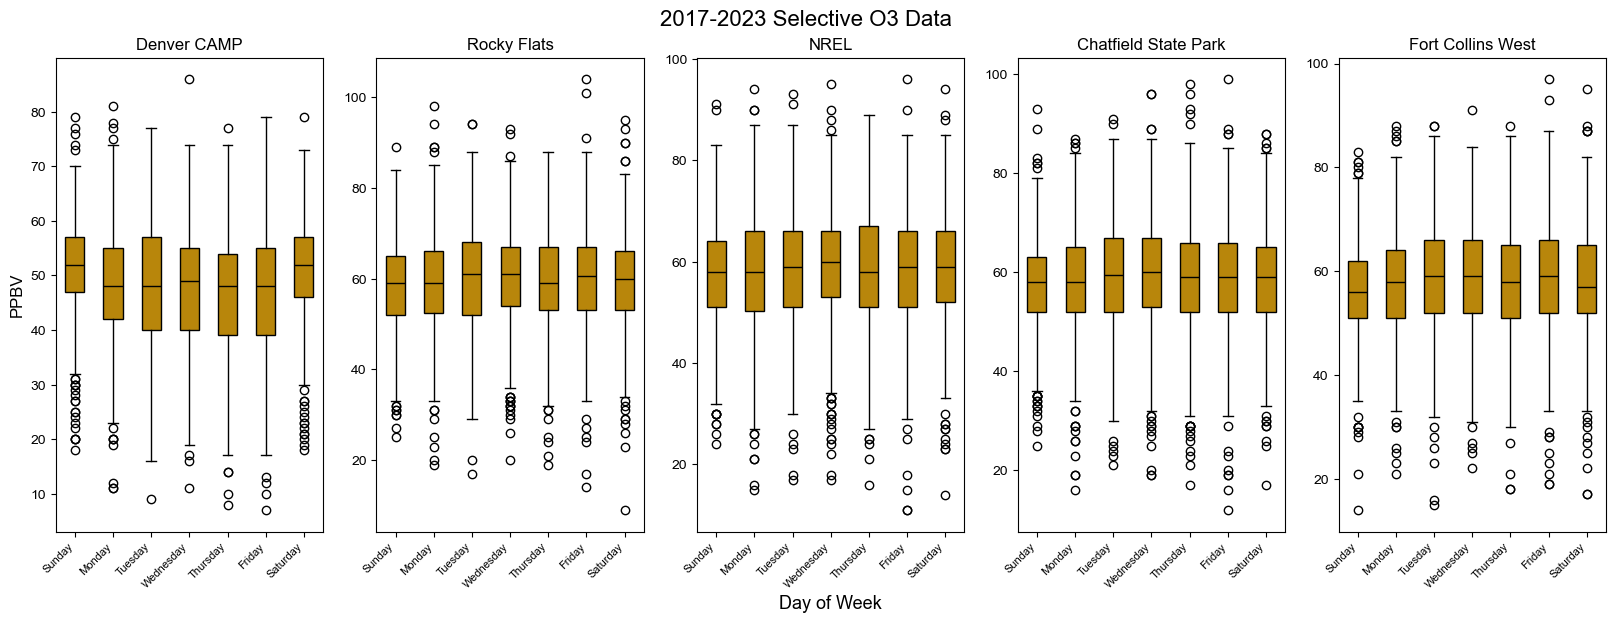

In [ ]:
# 2005-2017 boxplots 

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)

#restrain timeframe to AFTER 2017
#df0517 = df[(df.index.year>=2005)&(df.index.year<=2017)]
df1723 = df[df.index.year>=17]

#remove nans
#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

fig, ax = plt.subplots(1, 5, figsize = (20,6))
#titles the page
fig.suptitle("2017-2023 Selective O3 Data", fontsize = 16)
#adds space between plots
#fig.subplots_adjust(top = 09.5, hspace=0.3)

#makes the 2D array flat again?
ax = ax.flatten()
#font size
fs = 7
fs2 = 12
fs3 = 10
# tick labels

#BANKS
#titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
#locations = ['DENVER - CAMP', 'Welby', 'Aurora East', 'Chatfield State Park', 'HIGHLAND RESERVOIR', 'La Casa', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'ROCKY FLATS-N', 'Briggsdale', 'Greeley - Weld County Tower', 'Pawnee Buttes', 'FORT COLLINS - WEST', 'Fort Collins - CSU - S. Mason', "Rocky Mountain NP - Long's Peak"]

#CUSTOMIZATIONS
locations = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST', 'dayofweek']
titles = ['Denver CAMP', 'Rocky Flats', 'NREL', 'Chatfield State Park', 'Fort Collins West']
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#selected = df0517[df0517.columns[locations]]
selected1723 = df1723[locations]

num_plots = min(len(selected1723.columns), 3)  # Ensure we don't exceed the number of subplots available

#use a loop to do this to all columns all at once
for i, column in enumerate(selected1723.columns[:-1]):

        #arrayify 
        groupedselected1723 = selected1723.groupby('dayofweek')[column].apply(np.array) 
        groupedselected1723 = groupedselected1723.apply(remove_nans)
        ax[i].boxplot(groupedselected1723, patch_artist = True, boxprops = dict(facecolor = "darkgoldenrod"), medianprops = dict(color = "black"))
        ax[i].set_title(titles[i], fontsize = fs2)
        #tick labels
        ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize = 8) 
        #ax[i].set_ylim(0,140)
        #colors the region inside the chart
        #ax[i].set_facecolor(color)
        if i == 0:
            ax[i].set_ylabel('PPBV', fontsize=12)
        ax[-3].set_xlabel('Day of Week', fontsize=13)

fig.subplots_adjust(top = 0.9, hspace=0.2)

plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_32428\3366262058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


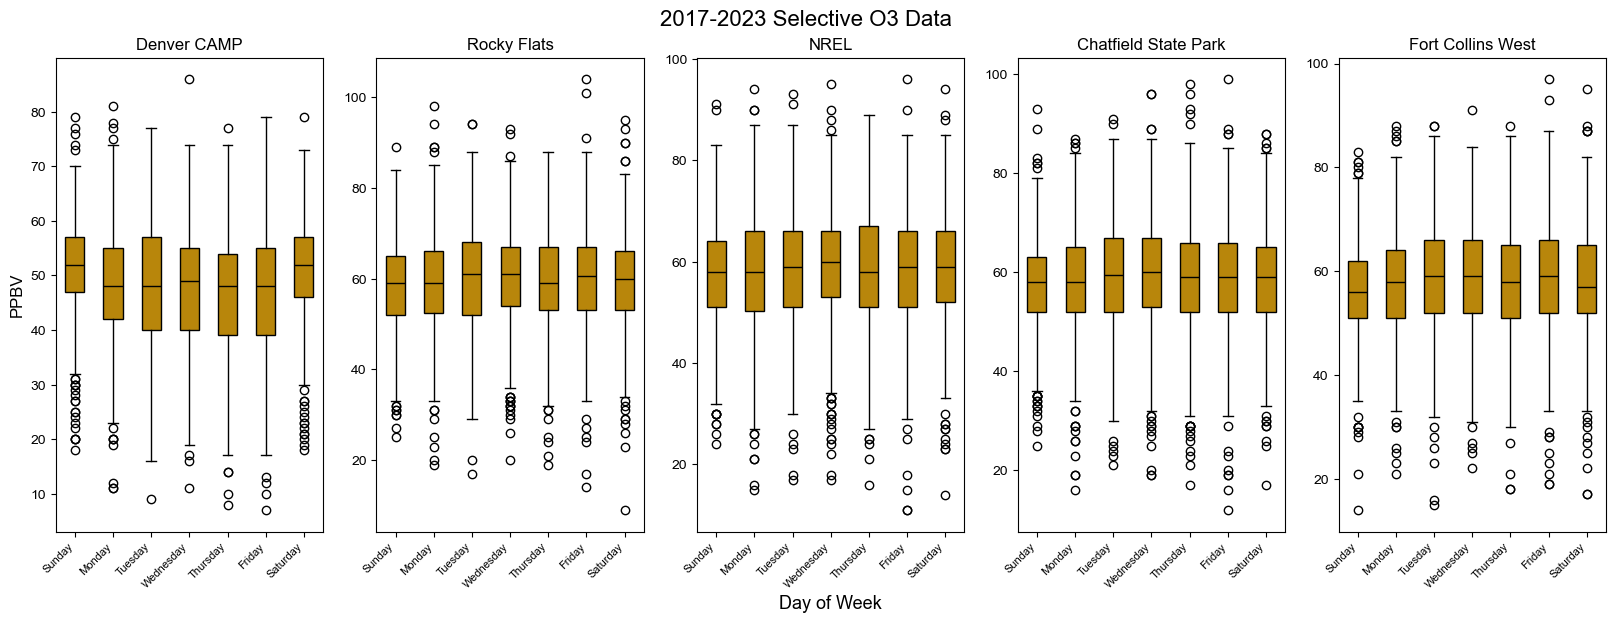

In [ ]:
# 2005-2017 boxplots 

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)

#restrain timeframe to AFTER 2017
df0517 = df[(df.index.year>=2005)&(df.index.year<=2017)]
#df1723 = df[df.index.year>=17]

#remove nans
#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

fig, ax = plt.subplots(1, 5, figsize = (20,6))
#titles the page
fig.suptitle("2017-2023 Selective O3 Data", fontsize = 16)
#adds space between plots
#fig.subplots_adjust(top = 09.5, hspace=0.3)

#makes the 2D array flat again?
ax = ax.flatten()
#font size
fs = 7
fs2 = 12
fs3 = 10
# tick labels

#BANKS
#titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
#locations = ['DENVER - CAMP', 'Welby', 'Aurora East', 'Chatfield State Park', 'HIGHLAND RESERVOIR', 'La Casa', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'ROCKY FLATS-N', 'Briggsdale', 'Greeley - Weld County Tower', 'Pawnee Buttes', 'FORT COLLINS - WEST', 'Fort Collins - CSU - S. Mason', "Rocky Mountain NP - Long's Peak"]

#CUSTOMIZATIONS
locations = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST', 'dayofweek']
titles = ['Denver CAMP', 'Rocky Flats', 'NREL', 'Chatfield State Park', 'Fort Collins West']
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#selected = df0517[df0517.columns[locations]]
selected1723 = df1723[locations]

num_plots = min(len(selected1723.columns), 3)  # Ensure we don't exceed the number of subplots available

#use a loop to do this to all columns all at once
for i, column in enumerate(selected1723.columns[:-1]):

        #arrayify 
        groupedselected1723 = selected1723.groupby('dayofweek')[column].apply(np.array) 
        groupedselected1723 = groupedselected1723.apply(remove_nans)
        ax[i].boxplot(groupedselected1723, patch_artist = True, boxprops = dict(facecolor = "darkgoldenrod"), medianprops = dict(color = "black"))
        ax[i].set_title(titles[i], fontsize = fs2)
        #tick labels
        ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize = 8) 
        #ax[i].set_ylim(0,140)
        #colors the region inside the chart
        #ax[i].set_facecolor(color)
        if i == 0:
            ax[i].set_ylabel('PPBV', fontsize=12)
        ax[-3].set_xlabel('Day of Week', fontsize=13)

fig.subplots_adjust(top = 0.9, hspace=0.2)

plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_32428\3347179194.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


IndexError: index 3 is out of bounds for axis 0 with size 3

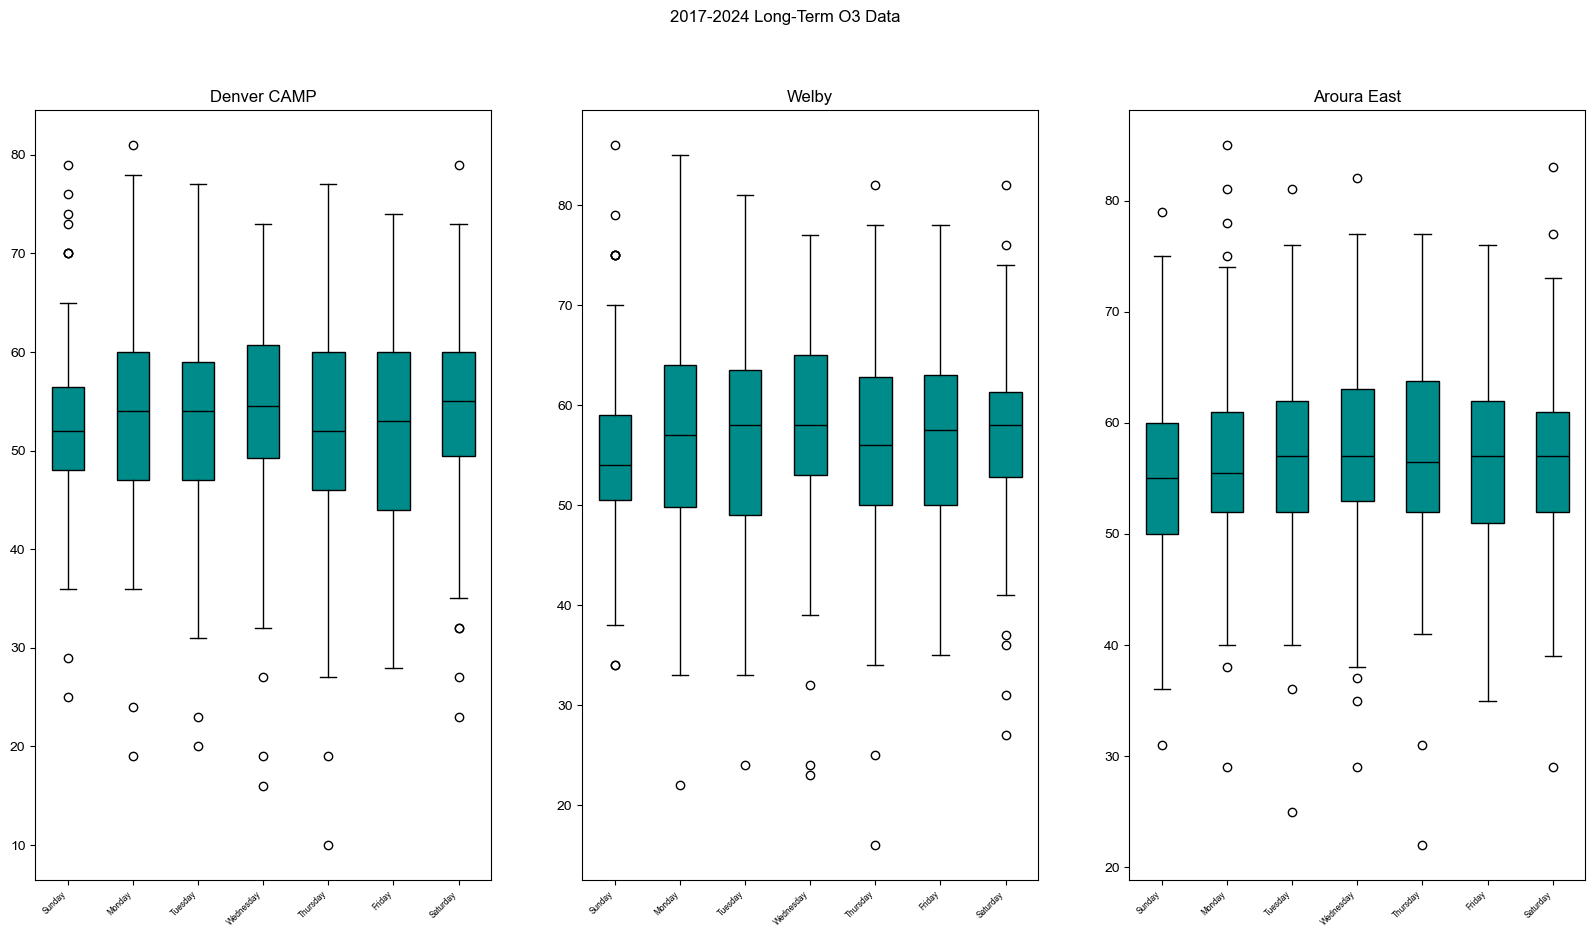

In [ ]:
#make plots 2005-2017, 2018-2023 plots of selective Locations to observe change in W/W effect
# #make this customizeable
# start with Denver, Welby, Rocky Flats 

# 2017-2024 boxplots 

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)

#restrain timeframe to AFTER 2017
df0517 = df[df.index.year>=2020]

#remove nans
def remove_nans(arr):
    return arr[~np.isnan(arr)]

fig, ax = plt.subplots(1, 3, figsize = (20, 10))
#titles the page
fig.suptitle("2017-2024 Long-Term O3 Data")
#adds space between plots
#fig.subplots_adjust(top = 09.5, hspace=0.3)

#makes the 2D array flat again?
ax = ax.flatten()
#font size
fs = 7
fs2 = 12
fs3 = 10
# tick labels
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']

num_plots = min(len(df0517.columns), 14)  # Ensure we don't exceed the number of subplots available

#use a loop to do this to all columns all at once
for i, column in enumerate(df0517.columns[:-1]):

        #arrayify 
        grouped0517 = df0517.groupby('dayofweek')[column].apply(np.array) 
        grouped0517 = grouped0517.apply(remove_nans)

        ax[i].boxplot(grouped0517, patch_artist = True, boxprops = dict(facecolor = "darkcyan"), medianprops = dict(color = "black"))
        ax[i].set_title(titles[i], fontsize = fs2)
        #tick labels
        ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize = 6) 
        #ax[i].set_ylim(0,140)
        #colors the region inside the chart
        #ax[i].set_facecolor(color)

for i in range(2):
    ax[i*7].set_ylabel('PPBV', fontsize=fs3)
for j in range(7):
    ax[7+j].set_xlabel('Year', fontsize=fs3)

fig.subplots_adjust(top = 0.9, hspace=0.3)

plt.show()

NameError: name 'averages_differences' is not defined

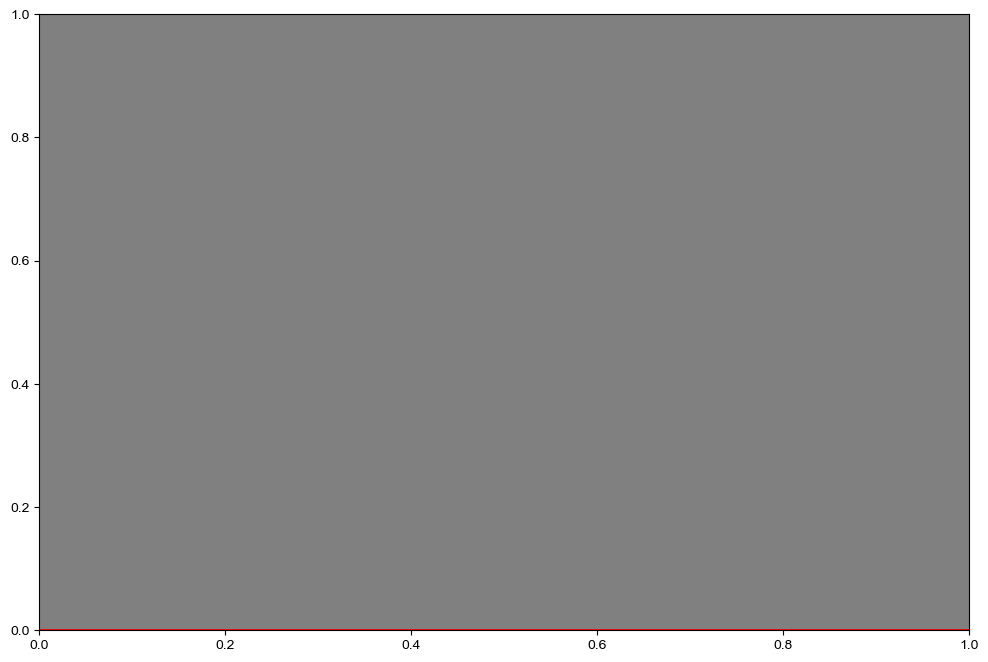

In [47]:
cmap = plt.get_cmap('terrain')
colors = cmap(np.linspace(0,1,14)) #get 10 colors along the full range of hsv colormap
#facecolor = darkgray
x = np.linspace(0,2*np.pi)
ys = np.ones((14,50)) * np.sin(x)
ys = np.array([ys[a,] * np.linspace(1,0.1,14)[a] for a in range(14)])

fig, ax = plt.subplots(figsize=(12,8))
ax.set_prop_cycle(color=colors) #set our 10 colors to the property cycle
ax.set_facecolor('gray') 
ax.axhline(y=0,linewidth=2, color='r')


titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
#colors = ['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue','red', 'blue','red', 'blue','red', 'blue']

#plt.figure(figsize=(12,8))

for i, title in enumerate(titles):
    plt.plot(averages_differences[i], label=title, color=colors[i])
    plt.legend()

#fig.patch.set_facecolor('pink') 

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.show() 

#think about what this means - all the spikes happen in the same place...
#spike years happen when there is significantly more weekday travel than weekend - and apparently the trend applies to all/most locations in a given year. 
# What about people causes this to happen? 

In [48]:
#2 sets of box plots (2005-2017, 2017-2024) for all long-term O3 sites #dude, what does this mean?
# A POSOTOVE TREND IN DIFFERNECS; IS THERE A POSITIVE TREN IN PRECURSORS?
#give VOCS a go; find trends and DOW dependance?
#analyze by tracer compund or group them into VOC families: alkanes, alkenes, aromatics
#fix the map

NameError: name 'averages_differences' is not defined

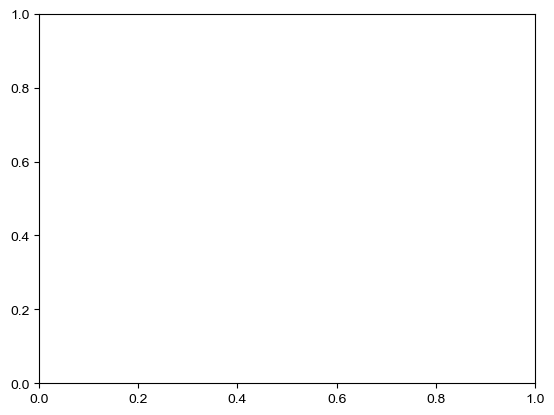

In [49]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0,1,14)) #get 10 colors along the full range of hsv colormap
#x = np.linspace(0,2*np.pi)
#ys = np.ones((14,50)) * np.sin(x)
#ys = np.array([ys[a,] * np.linspace(1,0.1,14)[a] for a in range(14)])

fig, ax = plt.subplots()
#ax.set_prop_cycle(color=colors) #set our 10 colors to the property cycle

titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
#colors = ['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue','red', 'blue','red', 'blue','red', 'blue']

#plt.figure(figsize=(12,8))

for i, title in enumerate(titles):
    plt.plot(averages_differences[i], averages_differences[i], label=title, color=colors[i])

#plt.legend()

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.facecolor(grey)
#plt.show() 

#plt.xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2024-01-01')) #make x axis limit uniform
#plt.xticks(pd.date_range('2005-01-01', '2024-01-01', freq='YE')-pd.Timedelta(days=364)) #make x axis ticks uniform

#think about what this means - all the spikes happen in the same place...

#plt.plot(x, ys.T)

In [50]:
titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
colors = ['forestgreen', 'mediumpurple', 'gold', 'cyan', 'lightsalmon', 'darkgrey', 'saddlebrown', 'magenta', 'orange', 'brown', 'crimson', 'navy', 'olivedrab', 'black']

plt.figure(figsize=(12,8))


for i, title in enumerate(titles):
    plt.plot(averages_differences[i], label=title, color=colors[i])
    ax.axhline(y=0,linewidth=2, color='r')


plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)
plt.axhline(y=0,linewidth=2, color='k')

plt.tight_layout()
plt.show() 

#think about what this means - all the spikes happen in the same place...

NameError: name 'averages_differences' is not defined

<Figure size 1200x800 with 0 Axes>

In [51]:
averages_differences[0]

NameError: name 'averages_differences' is not defined

In [52]:
#plot all the differences together

#creates a space for the plots to live
plt.figure(figsize=(12,8))
#corrects numpy.array issue that has no plot
#ax = ax.flatten()
titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']

for i in averages_differences:

    #averages_difference[column].plot(marker='s', label=titles)
    plt.plot(averages_difference, marker='s', label=titles)

plt.axhline(y=0, color='r', linestyle='-', linewidth=1)  # Add horizontal line at y=0

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

#!!!!!!!!!!!!!!!!!!



NameError: name 'averages_differences' is not defined

<Figure size 1200x800 with 0 Axes>

In [53]:
averages_difference

Date
2005    3.0
2006    3.0
2007    3.0
2008    3.0
2009    3.0
2010    3.0
2011    3.0
2012    3.0
2013    3.0
2014    3.0
2015    3.0
2016    3.0
2017    3.0
2018    3.0
2019    3.0
2020    3.0
2021    3.0
2022    3.0
2023    3.0
Name: dayofweek, dtype: float64

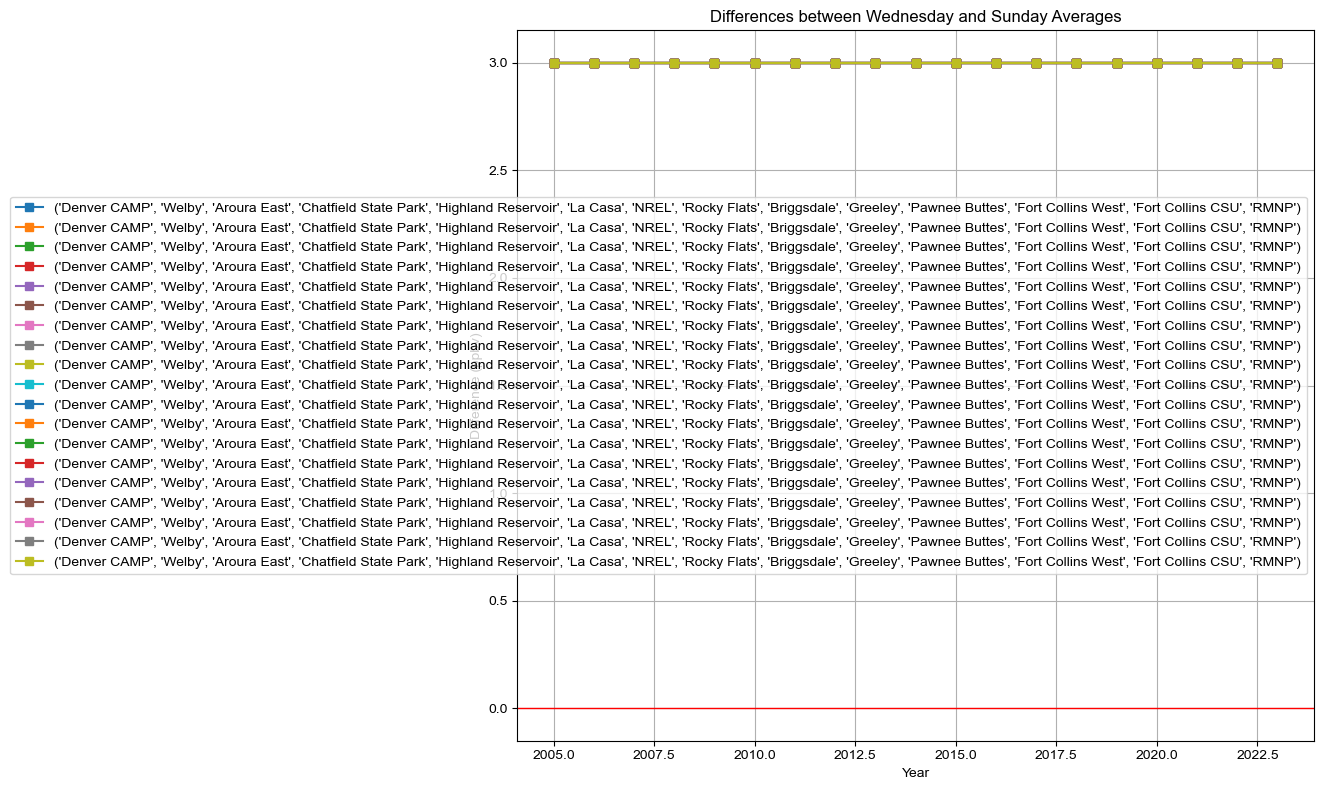

In [54]:
#plot all the differences together

#creates a space for the plots to live
plt.figure(figsize=(12,8))
#corrects numpy.array issue that has no plot
#ax = ax.flatten()
titles = ('Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP')

for column in averages_difference:

    #averages_difference[column].plot(marker='s', label=titles)
    plt.plot(averages_difference, marker='s', label=titles)

plt.axhline(y=0, color='r', linestyle='-', linewidth=1)  # Add horizontal line at y=0

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

#!!!!!!!!!!!!!!!!!!

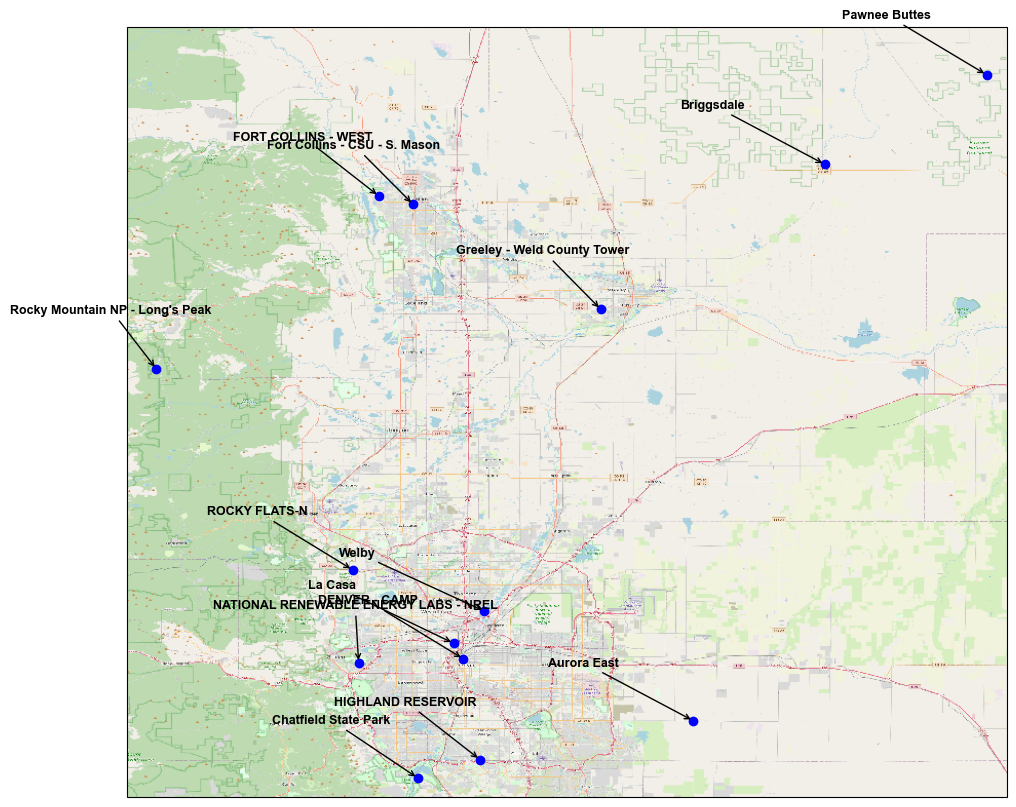

In [56]:
#map the locations

minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15, 10))

main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)

#o3_columns = df_2021.columns[df_2021.columns.str.endswith('_o3')]
#wd_columns = o3_columns.str.replace('_o3', '_wd')

#main_ax.scatter(coords.iloc[:,2], coords.iloc[:,1], color='b')
main_ax.scatter(coords['Site Longitude'], coords['Site Latitude'], color='b', transform=ccrs.PlateCarree())

#for i in range(len(coords)):
 #   t = main_ax.text(coords.iloc[:,2][i]+0.01, coords.iloc[:,1][i]+0.01, coords.iloc[:,0][i],  transform=ccrs.PlateCarree(), fontsize=9, fontweight='bold', c='k', zorder=2)
    #acecolor='white', alpha=0.8, edgecolor='white', boxstyle='square,pad=.01'))
for i, place in enumerate(coords['Local Site Name']):
    main_ax.annotate(place, xy=(coords['Site Longitude'][i], coords['Site Latitude'][i]),
                     xytext=(coords['Site Longitude'][i] + 0.1, coords['Site Latitude'][i] + 0.1),
                     textcoords='offset points', fontsize=9, fontweight='bold', c='k',
                     arrowprops=dict(facecolor='black', arrowstyle='->', zorder = 2))

request = cimgt.OSM()
#grabs map
main_ax.add_image(request, 11)
#zoom level

In [ ]:
# Mapping ASOS Weather Stations Across New York City and Annotating Them
# This code uses a spoofing algorithm to avoid bounceback from OSM servers
# -- This code also parses lat/lon information from the ASOS station .txt
# -- file located here: ftp://ftp.ncdc.noaa.gov/pub/data/ASOS_Station_Photos/asos-stations.txt
#
import csv
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import io
from urllib.request import urlopen, Request
from PIL import Image

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

################################
# parsing the ASOS coordinates
################################
#
#asos_data = []
#with open('asos-stations.txt','r') as dat_file:
#    reader = csv.reader(dat_file)
#    for row in reader:
#        asos_data.append(row)

row_delin = asos_data[3][0].split(' ')[:-1]
col_sizes = [len(ii) for ii in row_delin]

col_header = []; iter_ii = 0
for ii,jj in enumerate(col_sizes):
    col_header.append(asos_data[2][0][iter_ii:iter_ii+col_sizes[ii]].replace(' ',''))
    iter_ii+=col_sizes[ii]+1
    
call,names,lats,lons,elevs = [],[],[],[],[]
for row in asos_data[4:]:
    data = []; iter_cc = 0
    for cc in range(0,len(col_header)):
        data.append(row[0][iter_cc:iter_cc+col_sizes[cc]].replace('  ',''))
        iter_cc+=col_sizes[cc]+1
    call.append(data[3])
    names.append(data[4])
    lats.append(float(data[9]))
    lons.append(float(data[10]))
    elevs.append(float(data[11]))

#######################################
# Formatting the Cartopy plot
#######################################
#
cimgt.Stamen.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.Stamen('terrain') # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
ax1.set_title('ASOS Station Map',fontsize=16)
# extent = [-124.7844079,-66.9513812, 24.7433195, 49.3457868] # Contiguous US bounds
extent = [-74.257159,-73.699215,40.495992,40.915568] # NYC bounds
ax1.set_extent(extent) # set extents
ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # set longitude indicators
ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats
ax1.xaxis.set_major_formatter(lon_formatter) # set lons
ax1.yaxis.set_major_formatter(lat_formatter) # set lats
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification

#######################################
# Plot the ASOS stations as points
#######################################
#
ax1.plot(lons, lats, markersize=10,marker='o',linestyle='',color='#b30909',transform=ccrs.PlateCarree(),label='ASOS Station')
transform = ccrs.PlateCarree()._as_mpl_transform(ax1) # set transform for annotations
# text annotations
for lat_s,lon_s,name_s in zip(lats,lons,names): # loop through lats/lons/names
    if lon_s>extent[0] and lon_s<extent[1] and lat_s>extent[2] and lat_s<extent[3]:
        print(name_s)
        # annotations, with some random placement to avoid overlap
        ax1.text(lon_s, lat_s+(np.random.randn(1)*0.01),name_s, {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=transform,bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'))

ax1.legend() # add a legend 
plt.show() # show plot

IndexError: list index out of range

In [ ]:
# Mapping New York City Open Street Map (OSM) with Cartopy
# This code uses a spoofing algorithm to avoid bounceback from OSM servers
#
import matplotlib.pyplot as plt 
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image


#extent =
minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map
#[minlon, maxlon, minlat, maxlat]

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [40.577470,-105.078920] # lat/long of CSU
zoom = 0.00075 # for zooming out of center point
extent = [center_pt[1]-(zoom*4.0),center_pt[1]+(zoom*4.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent([minlon, maxlon, minlat, maxlat]) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings
plt.show() # show the plot

In [57]:
coords
short_names = ['Welby', 'Highland Reservoir', 'Aroura East', 'Denver', 'La Casa', 'Chatfield State Park', 'Rocky Flats', 'NREL', 'Greeley', 'Briggsdale', 'Pawnee Buttes', 'RMNP', 'Fort Collins West', 'Fort Collins CSU']
shorter_names = ['Welby', 'Highland', 'Aroura', 'Denver', 'La Casa', 'Chatfield', 'Rocky Flats', 'NREL', 'Greeley', 'Briggsdale', 'Pawnee Buttes', 'RMNP', 'F.C. West', 'F.C. CSU']

# Add custom names as a new column
coords['Short Name'] = short_names
coords['Shorter Name'] = shorter_names

# Display the updated DataFrame
print(coords)


                          Local Site Name  Site Latitude  Site Longitude  \
0                                   Welby      39.838119     -104.949840   
1                      HIGHLAND RESERVOIR      39.567887     -104.957193   
2                             Aurora East      39.638522     -104.569335   
3                           DENVER - CAMP      39.751184     -104.987625   
4                                 La Casa      39.779490     -105.005180   
5                    Chatfield State Park      39.534488     -105.070358   
6                           ROCKY FLATS-N      39.912799     -105.188587   
7   NATIONAL RENEWABLE ENERGY LABS - NREL      39.743724     -105.177989   
8             Greeley - Weld County Tower      40.386368     -104.737440   
9                              Briggsdale      40.650000     -104.330000   
10                          Pawnee Buttes      40.813000     -104.036000   
11        Rocky Mountain NP - Long's Peak      40.278130     -105.545640   
12          

In [58]:
coords

Local Site Name  Site Latitude  Site Longitude  \
0                                   Welby      39.838119     -104.949840   
1                      HIGHLAND RESERVOIR      39.567887     -104.957193   
2                             Aurora East      39.638522     -104.569335   
3                           DENVER - CAMP      39.751184     -104.987625   
4                                 La Casa      39.779490     -105.005180   
5                    Chatfield State Park      39.534488     -105.070358   
6                           ROCKY FLATS-N      39.912799     -105.188587   
7   NATIONAL RENEWABLE ENERGY LABS - NREL      39.743724     -105.177989   
8             Greeley - Weld County Tower      40.386368     -104.737440   
9                              Briggsdale      40.650000     -104.330000   
10                          Pawnee Buttes      40.813000     -104.036000   
11        Rocky Mountain NP - Long's Peak      40.278130     -105.545640   
12                    FORT COLLINS - WEST      40.592543     -105.141122   
13          Fort Collins - CSU - S. Mason      40.577470     -105.078920   

              Short Name   Shorter Name  
0                  Welby          Welby  
1     Highland Reservoir       Highland  
2            Aroura East         Aroura  
3                 Denver         Denver  
4                La Casa        La Casa  
5   Chatfield State Park      Chatfield  
6            Rocky Flats    Rocky Flats  
7                   NREL           NREL  
8                Greeley        Greeley  
9             Briggsdale     Briggsdale  
10         Pawnee Buttes  Pawnee Buttes  
11                  RMNP           RMNP  
12     Fort Collins West      F.C. West  
13      Fort Collins CSU       F.C. CSU

In [59]:
#try to make a new map with folium package

minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map
southwest = (39.368586, -105.702622)  # (lat, lon)
northeast = (40.996635, -103.706782)  # (lat, lon)
zoom = 5
#the zoom is doing something very wierd but will deal with later

#O3trendscolors = b

my_map1 = folium.Map(location = [40.577470, -105.078920], zoom_start = zoom, titles = "CartoDB Positron", zoom_control=False, dragging=False, scrollWheelZoom=False)
#try titles = OpenStreetMap, Mapbox, or CartoDB Positron
#these maps are interactive if you make the ending parameters True
my_map1.fit_bounds([southwest, northeast])

for i, column in coords.iterrows():
    #folium.Marker([column['Site Latitude'], column['Site Longitude']], popup=column['Local Site Name'], icon = folium.Icon(color = 'black', icon = 'circle')).add_to(my_map1)
    #folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 2, color = 'black', fill=True, fill_color='blue', popup=folium.Popup(column['Local Site Name'], max_width=300)).add_to(my_map1)
    folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 5, weight = 0.5, color = 'black', opacity = 1, fill=True, fill_color='black', fill_opacity = 1).add_child(folium.Popup('My name is Circle')).add_to(my_map1)
#try cloud, star, info-sign markers, etc. 
# folium.CircleMarker() is also a thing
#adding popup markers are an interactive element where if you click on the marker a text box with various info appears

for i, column in coords.iterrows():
#determine if label should sit on left or right side of marker
    if column['Site Latitude'] == 40.592543:
        label_position = 'left'
    else:
        label_position = 'right'

# Add text next to the marker    
# # Customize the label style (text size, font, location); use an f-string?

    label_html = f"""<div style="background-color: white; border: 1px solid black;border-radius: 5px;padding: 2px; font-family: Arial, sans-serif; color: black; font-size: 11px; font-weight: bold; text-align: center; margin-top: -10px;  /* Adjust vertical position */
               margin-left: 10px; /* Adjust horizontal position */ padding: 1px; border-radius: 2px; white-space: nowrap; display: inline-block; float: {label_position}; z-index: 1000; "> {column['Shorter Name']}</div>"""

#label_html = f"""<div style="background-color: whiteborder: 1px solid black;border-radius: 5px;padding: 2px;font-family: Arial, sans-serif;color: black;font-size: 11px;font-weight: bold;text-align: center;white-space: nowrap;
#display: inline-block;float: {label_position};z-index: 1000; /* Ensure label appears above markers */">{column['Shorter Name']}</div>"""


# Add the label next to the marker
    folium.Marker(location=[column['Site Latitude'], column['Site Longitude']], icon=folium.DivIcon(html=label_html), tooltip=column['Local Site Name'],  # Optional tooltip for additional information
        ).add_to(my_map1)

# save method of Map object will create a map
my_map1.save("my_map1.html" )

#use folium.CustomPane() to add another layer with labels - nevermind
#you can also add and outline polygons using folium; might be helpful for highlighing regions of different activity

my_map1

# help with plotting many diffent types of points (for later on): https://geopandas.org/en/stable/gallery/plotting_with_folium.html


In [60]:
#try to make a new map with folium package

#minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map
southwest = (39.993076, -106.045223)  # (lat, lon)
northeast = (43.003444, -100.041524)  # (lat, lon)
zoom = 20
#the zoom is doing something very wierd but will deal with later

#O3trendscolors = b

my_map1 = folium.Map(location = [40.577470, -105.078920], zoom_start = zoom, titles = "CartoDB Positron", zoom_control=False, dragging=False, scrollWheelZoom=False)
#try titles = OpenStreetMap, Mapbox, or CartoDB Positron
#these maps are interactive if you make the ending parameters True
my_map1.fit_bounds([southwest, northeast])

for i, column in coords.iterrows():
    #southwest[0]=southwest[0]+np.random.uniform(0.001, 10**(-20))-0.00005
    #southwest[1]=southwest[1]+np.random.uniform(0.001, 10**(-20))-0.00005
    #folium.Marker(southwest, popup='{}'.format( i )).add_to(my_map1)



    #folium.Marker([column['Site Latitude'], column['Site Longitude']], popup=column['Local Site Name'], icon = folium.Icon(color = 'black', icon = 'circle')).add_to(my_map1)
    #folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 2, color = 'black', fill=True, fill_color='blue', popup=folium.Popup(column['Local Site Name'], max_width=300)).add_to(my_map1)
    #folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 4, weight = 0.5, color = 'black', opacity = 1, fill=True, fill_color='blue', fill_opacity = 1).add_child(folium.Popup('My name is Circle')).add_to(my_map1)
#try cloud, star, info-sign markers, etc. 
# folium.CircleMarker() is also a thing
#adding popup markers are an interactive element where if you click on the marker a text box with various info appears
    # Add text next to the marker
    # Customize the label style (text size, font, location); use an f-string?
    label_html = f"""<div style="font-family: Arial, sans-serif; color: black; font-size: 12px; font-weight: bold; text-align: center; margin-top: -10px;  /* Adjust vertical position */
                margin-left: 10px; /* Adjust horizontal position */ padding: 5px; border-radius: 10px; white-space: nowrap;"> {column['Local Site Name']}</div>"""
    #background-color: white; 
    # Add the label next to the marker
    folium.Marker(location=[column['Site Latitude'], column['Site Longitude']], icon=folium.DivIcon(html=label_html), tooltip=column['Local Site Name'],  # Optional tooltip for additional information
    ).add_to(my_map1)


# save method of Map object will create a map
my_map1.save("my_map1.html" )

#use folium.CustomPane() to add another layer with labels - nevermind
#you can also add and outline polygons using folium; might be helpful for highlighing regions of different activity

my_map1

# help with plotting many diffent types of points (for later on): https://geopandas.org/en/stable/gallery/plotting_with_folium.html


In [61]:
coords

Local Site Name  Site Latitude  Site Longitude  \
0                                   Welby      39.838119     -104.949840   
1                      HIGHLAND RESERVOIR      39.567887     -104.957193   
2                             Aurora East      39.638522     -104.569335   
3                           DENVER - CAMP      39.751184     -104.987625   
4                                 La Casa      39.779490     -105.005180   
5                    Chatfield State Park      39.534488     -105.070358   
6                           ROCKY FLATS-N      39.912799     -105.188587   
7   NATIONAL RENEWABLE ENERGY LABS - NREL      39.743724     -105.177989   
8             Greeley - Weld County Tower      40.386368     -104.737440   
9                              Briggsdale      40.650000     -104.330000   
10                          Pawnee Buttes      40.813000     -104.036000   
11        Rocky Mountain NP - Long's Peak      40.278130     -105.545640   
12                    FORT COLLINS - WEST      40.592543     -105.141122   
13          Fort Collins - CSU - S. Mason      40.577470     -105.078920   

              Short Name   Shorter Name  
0                  Welby          Welby  
1     Highland Reservoir       Highland  
2            Aroura East         Aroura  
3                 Denver         Denver  
4                La Casa        La Casa  
5   Chatfield State Park      Chatfield  
6            Rocky Flats    Rocky Flats  
7                   NREL           NREL  
8                Greeley        Greeley  
9             Briggsdale     Briggsdale  
10         Pawnee Buttes  Pawnee Buttes  
11                  RMNP           RMNP  
12     Fort Collins West      F.C. West  
13      Fort Collins CSU       F.C. CSU

In [62]:
# retrain locations for the poster

#select locations to be used: based off of long-term data, problemness, O3 concentration, etc. 
locations = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST']
#location_indexs = ['3', '6', '7', '5', '12']
#create a new dataframe with only the designated locations for the poster
#postercoords = coords[locations].copy()
#test
#postercoords
#this (above) is for coulns of a dataframe not rows; try again

#objective is to extract a subset of rows from the coords dataframe to make a postercoords dataframe
#use .iloc for integer-based indexing, which we set up earlier.
postercoords = coords.iloc[['3', '6', '7', '5', '12']] #location_indexs = ['3', '6', '7', '5', '12']
print(postercoords)

#coords
#short_names = ['Welby', 'Highland Reservoir', 'Aroura East', 'Denver', 'La Casa', 'Chatfield State Park', 'Rocky Flats', 'NREL', 'Greeley', 'Briggsdale', 'Pawnee Buttes', 'RMNP', 'Fort Collins West', 'Fort Collins CSU']
#shorter_names = ['Welby', 'Highland', 'Aroura', 'Denver', 'La Casa', 'Chatfield', 'Rocky Flats', 'NREL', 'Greeley', 'Briggsdale', 'Pawnee Buttes', 'RMNP', 'F.C. West', 'F.C. CSU']

# Add custom names as a new column
#coords['Short Name'] = short_names
#coords['Shorter Name'] = shorter_names


                          Local Site Name  Site Latitude  Site Longitude  \
3                           DENVER - CAMP      39.751184     -104.987625   
6                           ROCKY FLATS-N      39.912799     -105.188587   
7   NATIONAL RENEWABLE ENERGY LABS - NREL      39.743724     -105.177989   
5                    Chatfield State Park      39.534488     -105.070358   
12                    FORT COLLINS - WEST      40.592543     -105.141122   

              Short Name Shorter Name  
3                 Denver       Denver  
6            Rocky Flats  Rocky Flats  
7                   NREL         NREL  
5   Chatfield State Park    Chatfield  
12     Fort Collins West    F.C. West  


In [63]:
#redo map using smaller datafram with selected poster coordinates 

locations = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST', 'dayofweek']
titles = ['Denver CAMP', 'Rocky Flats', 'NREL', 'Chatfield State Park', 'Fort Collins West']
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map
southwest = (39.368586, -105.702622)  # (lat, lon)
northeast = (40.996635, -103.706782)  # (lat, lon)
zoom = 5
#the zoom is doing something very wierd but will deal with later

#O3trendscolors = b

my_map1 = folium.Map(location = [40.577470, -105.078920], zoom_start = zoom, titles = "CartoDB Positron", zoom_control=False, dragging=False, scrollWheelZoom=False)
#try titles = OpenStreetMap, Mapbox, or CartoDB Positron
#these maps are interactive if you make the ending parameters True
my_map1.fit_bounds([southwest, northeast])

for i, column in postercoords.iterrows():
    #folium.Marker([column['Site Latitude'], column['Site Longitude']], popup=column['Local Site Name'], icon = folium.Icon(color = 'black', icon = 'circle')).add_to(my_map1)
    #folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 2, color = 'black', fill=True, fill_color='blue', popup=folium.Popup(column['Local Site Name'], max_width=300)).add_to(my_map1)
    folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 7, weight = 0.5, color = 'black', opacity = 1, fill=True, fill_color='black', fill_opacity = 1).add_child(folium.Popup('My name is Circle')).add_to(my_map1)
#try cloud, star, info-sign markers, etc. 
# folium.CircleMarker() is also a thing
#adding popup markers are an interactive element where if you click on the marker a text box with various info appears

# Add text next to the marker    
# # Customize the label style (text size, font, location); use an f-string?

    label_html = f"""<div style="background-color: white; border: 1px solid black;border-radius: 5px;padding: 2px; font-family: Arial, sans-serif; color: black; font-size: 15px; font-weight: bold; text-align: center; margin-top: -10px;  /* Adjust vertical position */
               margin-left: 10px; /* Adjust horizontal position */ padding: 1px; border-radius: 2px; white-space: nowrap; display: inline-block; z-index: 1000; "> {column['Short Name']}</div>"""

#label_html = f"""<div style="background-color: whiteborder: 1px solid black;border-radius: 5px;padding: 2px;font-family: Arial, sans-serif;color: black;font-size: 11px;font-weight: bold;text-align: center;white-space: nowrap;
#display: inline-block;float: {label_position};z-index: 1000; /* Ensure label appears above markers */">{column['Shorter Name']}</div>"""

# Add the label next to the marker
    folium.Marker(location=[column['Site Latitude'], column['Site Longitude']], icon=folium.DivIcon(html=label_html), tooltip=column['Local Site Name'],  # Optional tooltip for additional information
        ).add_to(my_map1)

# save method of Map object will create a map
my_map1.save("my_map1.html" )

#use folium.CustomPane() to add another layer with labels - nevermind
#you can also add and outline polygons using folium; might be helpful for highlighing regions of different activity

my_map1

# help with plotting many diffent types of points (for later on): https://geopandas.org/en/stable/gallery/plotting_with_folium.html


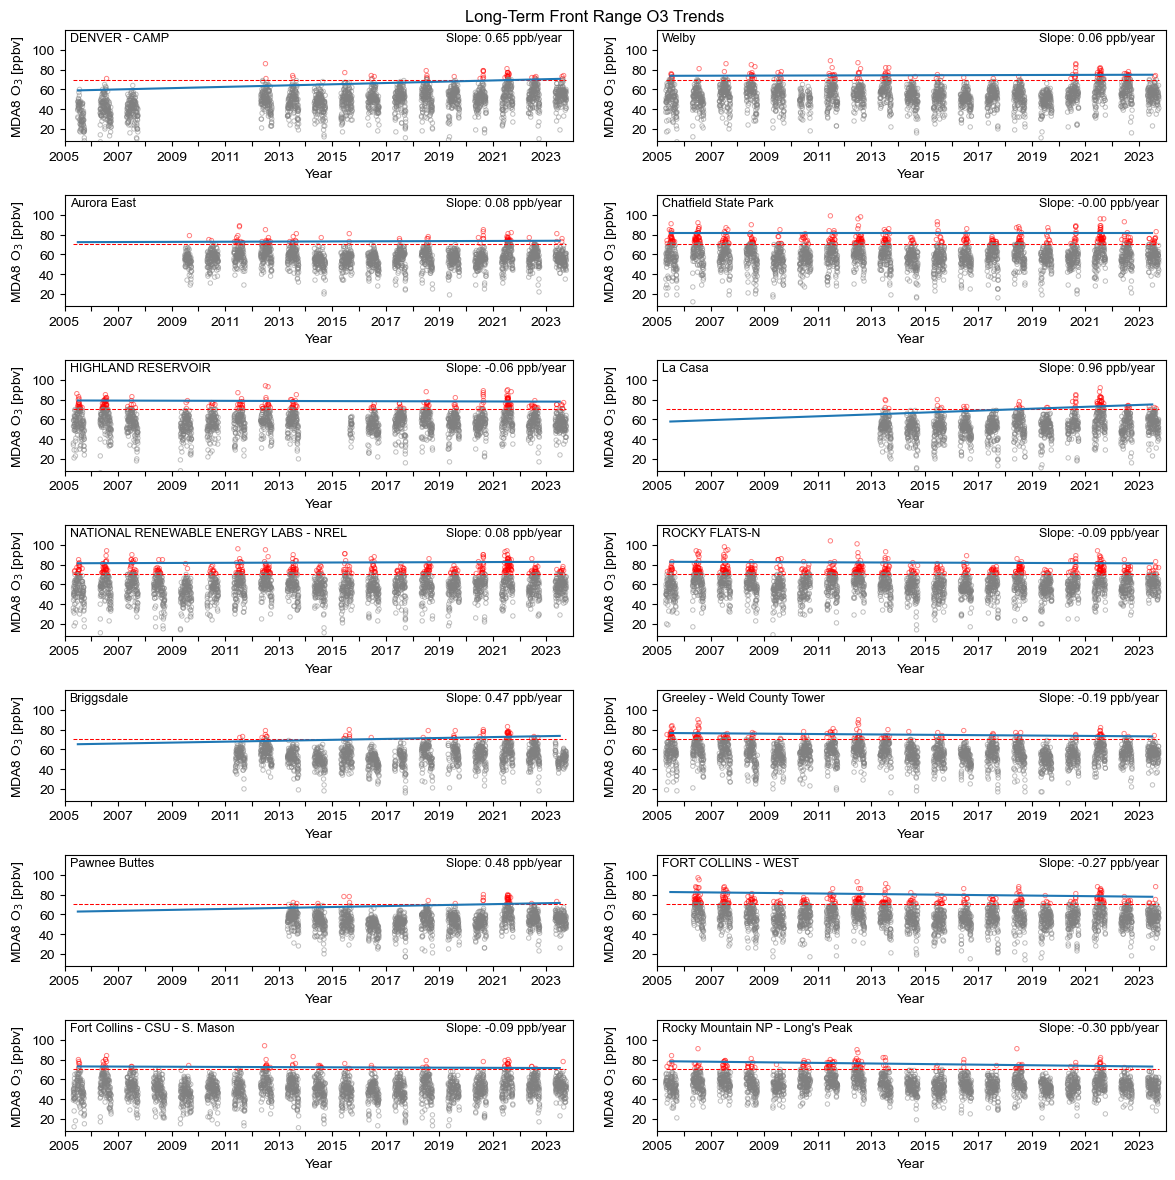

In [64]:
#plot data (long-term O3 trends)

quantile = 0.98

fig, axes = plt.subplots(int(len(df.columns)/2), 2, figsize = (12, 12)) #set up figure to have a separate column for each site (determined by len(df.columns))

ax = axes.flatten() #turn axes into a 1D array for easy looping
for i, site in enumerate(df.columns): #loop through all sites
        
    x = df.index #isolate datetime index
    y = df[site] #isolate data for the current site
        
    y_ex = y[y > 70] #isolate exceedance days (MDA8 > 70 ppb) and plot in red
    ax[i].scatter(x[y > 70], y_ex, label=site, alpha=.5, lw=0.7, s=10, marker='o', color='r', facecolor='none', zorder=0)
        
    y_below = y[y <= 70] #plot the rest of the days in gray
    ax[i].scatter(x[y <= 70], y_below , label=site, alpha=.5, lw=0.7, s=10, marker='o', color='gray', facecolor='none', zorder=0)

    x_ordinal = x.map(pd.Timestamp.toordinal) #creates a dataframe of x values that are increasing numbers
    x_ordinal = (x_ordinal - x_ordinal.min())/(x_ordinal.max() - x_ordinal.min()) #normalizes x_ordinal numers starting at 0
    data = pd.DataFrame({'y':y, 'x':x_ordinal}).dropna()

    model = smf.quantreg('y ~ x', data) #establish model
    result = model.fit(q=quantile)

    #plot a line, with x (array of years) and y values
    years = np.arange(len(x.year.unique())) #creates array (list) of individual years
    slope = result.params['x']/(len(x_ordinal)/365) #grabs slope and sets in in ppb per year not day
    #add std error later

    ax[i].plot(df.resample('YE').mean().index-pd.Timedelta(days=365/2),
       slope*years+result.params['Intercept']) #set up line using y = mx+b
    
    ax[i].annotate(f"Slope: {slope:.2f} ppb/year", xy=(0.75, 0.90), xycoords='axes fraction', fontsize=9) #what does slope represent again? Just general change?

for i in range(len(ax)):
    ax[i].set_ylim(8,120) #make y axis limits uniform
    ax[i].set_yticks([20, 40, 60, 80, 100]) #make y axis ticks uniform
    ax[i].set_xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2024-01-01')) #make x axis limit uniform
    ax[i].set_xticks(pd.date_range('2005-01-01', '2024-01-01', freq='YE')-pd.Timedelta(days=364)) #make x axis ticks uniform
    ax[i].hlines(70, xmin=df.index[0], xmax=df.index[-1], color='r', zorder=0, ls='--', lw=0.75) #add horizontal line at 70 ppb
    ax[i].annotate(df.columns[i], xy=(0.01, 0.90), xycoords='axes fraction', fontsize=9) #add site name to plots
    ax[i].set_ylabel('MDA8 O$_3$ [ppbv]') #add y axis label
    ax[i].set_xlabel('Year')

    #clean up x axis ticks
    for j, tick in enumerate(ax[i].xaxis.get_major_ticks()):
        if j % 2 == 1 and i < len(ax[i].xaxis.get_major_ticks()) - 1:
            tick.label1.set_visible(False)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.suptitle("Long-Term Front Range O3 Trends")

fig.tight_layout() #automatically adjusts subplot spacing

#figure out how to truncate some of the lines 

#2021 pyrogenic smoke comes from fires that are far away 

In [65]:
import geopandas as gpd

In [91]:
#redo map using smaller datafram with selected poster coordinates 

#create non-attainment area

NAA = gpd.read_file("C:\\Users\\C837398661\\Downloads\\COMPOSID_Ozone_8-hr.2015.Denver.gpkg")
NAA = NAA.to_json()

locations = ['DENVER - CAMP', 'ROCKY FLATS-N', 'NATIONAL RENEWABLE ENERGY LABS - NREL', 'Chatfield State Park', 'FORT COLLINS - WEST', 'dayofweek']
titles = ['Denver CAMP', 'Rocky Flats', 'NREL', 'Chatfield State Park', 'Fort Collins West']
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map
southwest = (39.368586, -105.702622)  # (lat, lon)
northeast = (40.996635, -103.706782)  # (lat, lon)
zoom = 5
#the zoom is doing something very wierd but will deal with later

#O3trendscolors = b

my_map1 = folium.Map(location = [40.577470, -105.078920], zoom_start = zoom, titles = "CartoDB Positron", zoom_control=False, dragging=False, scrollWheelZoom=True)
#try titles = OpenStreetMap, Mapbox, or CartoDB Positron
#these maps are interactive if you make the ending parameters True
my_map1.fit_bounds([southwest, northeast])

folium.GeoJson(NAA, style_function = lambda feature: {'color': 'orange', 'weight': 3, 'fillopacity ': 0.1}).add_to(my_map1)

for i, column in postercoords.iterrows():
    #folium.Marker([column['Site Latitude'], column['Site Longitude']], popup=column['Local Site Name'], icon = folium.Icon(color = 'black', icon = 'circle')).add_to(my_map1)
    #folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 2, color = 'black', fill=True, fill_color='blue', popup=folium.Popup(column['Local Site Name'], max_width=300)).add_to(my_map1)
    folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 4, weight = 0.5, color = 'black', opacity = 1, fill=True, fill_color='black', fill_opacity = 1).add_child(folium.Popup('My name is Circle')).add_to(my_map1)
#try cloud, star, info-sign markers, etc. 
# folium.CircleMarker() is also a thing
#adding popup markers are an interactive element where if you click on the marker a text box with various info appears

# Add text next to the marker    
# # Customize the label style (text size, font, location); use an f-string?

    label_html = f"""<div style="background-color: white; border: 1px solid black;border-radius: 5px;padding: 2px; font-family: Arial, sans-serif; color: black; font-size: 8px; font-weight: bold; text-align: center; margin-top: -10px;  /* Adjust vertical position */
               margin-left: 10px; /* Adjust horizontal position */ padding: 1px; border-radius: 2px; white-space: nowrap; display: inline-block; z-index: 1000; "> {column['Short Name']}</div>"""

#label_html = f"""<div style="background-color: whiteborder: 1px solid black;border-radius: 5px;padding: 2px;font-family: Arial, sans-serif;color: black;font-size: 11px;font-weight: bold;text-align: center;white-space: nowrap;
#display: inline-block;float: {label_position};z-index: 1000; /* Ensure label appears above markers */">{column['Shorter Name']}</div>"""

# Add the label next to the marker
    folium.Marker(location=[column['Site Latitude'], column['Site Longitude']], icon=folium.DivIcon(html=label_html), tooltip=column['Local Site Name'],  # Optional tooltip for additional information
        ).add_to(my_map1)

# save method of Map object will create a map
my_map1.save("my_map1.html" )

#use folium.CustomPane() to add another layer with labels - nevermind
#you can also add and outline polygons using folium; might be helpful for highlighing regions of different activity

my_map1

# help with plotting many diffent types of points (for later on): https://geopandas.org/en/stable/gallery/plotting_with_folium.html

import io
from PIL import Image
import selenium
from selenium import webdriver
from PIL import Image
import time
import os

img_data = my_map1._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

#download_dir = os.path.join(os.path.expanduser("~"), "Downloads")
#png_file = os.path.join(download_dir, "my_map.png")

#if not os.path.exists(download_dir):
#    os.makedirs(download_dir)
#html_file = os.path.join(download_dir, "my_map2.html")
#my_map1.to_html(filename=html_file, title="My Map2", width="100%", height="880px")
#png_file = os.path.join(download_dir, "my_map2.png")


ModuleNotFoundError: No module named 'selenium'